# 예측 모델
 > ## 1. MLP(hidden layer 1개, tensorflow)
 ## 2. MLP(hidden layer 2개, tensorflow)
 ## 3. MLP, DNN(keras)
 ## 4. Randomforest
 ## 5. XGBoost
 ## 6. LightGBM
 ## 7. Lasso
 ## 8. ElasticNet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/airi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

In [3]:
y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
display(x_train.head())
display(x_test.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.784689,1.214179,-0.112313,0.251255,1.129973,-0.251374,-0.547956,-0.423910,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0
1,0.403194,-0.859795,-0.112313,0.251255,-0.833091,3.880135,-0.132294,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
2,-0.569273,1.220996,-0.112313,0.251255,1.129973,-0.251374,0.167200,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.437869,1.155241,-0.112313,0.251255,1.129973,-0.251374,0.329240,2.903308,0.751112,-1.027091,...,0,0,0,0,1,0,1,1,0,0
4,0.098904,1.318031,-0.112313,1.273273,1.129973,-0.251374,0.256527,-0.423910,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.648517,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,-0.166720,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
1,0.566804,-0.859795,-0.112313,0.251255,-0.833091,-0.251374,0.118809,-0.42391,-0.979803,-1.027091,...,0,0,0,0,1,0,1,1,0,0
2,-0.543248,1.119259,-0.112313,0.251255,-0.833091,-0.251374,-0.603727,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
3,-0.549736,1.103498,-0.112313,0.251255,-0.833091,-0.251374,-0.041299,-0.42391,0.751112,0.810093,...,0,0,0,0,1,0,1,1,0,0
4,0.447860,-0.859795,-0.112313,-1.016868,-0.833091,-0.251374,0.830074,-0.42391,-0.979803,0.810093,...,0,0,0,0,1,0,1,1,0,0


- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

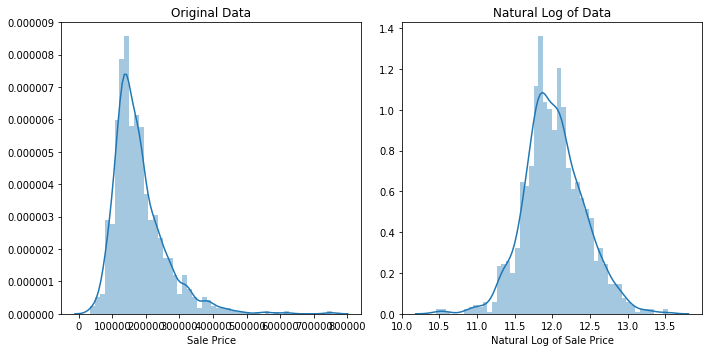

In [5]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### score 도출해주는 함수 선언

In [6]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

지금까지가 데이터 로딩이다. 추후 1번부터 6번까지 모델 정의 및 label 예측이다.<br>
1, 4, 5, 6은 직접적으로 예측에 사용한다. 2, 3은 모델은 정의했지만 생각대로 예측이 정확하게 되지 않아 배제하였다.

- - -
 # 1. MLP(hidden layer 1개, tensorflow)

In [7]:
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### hyperparameter init

In [8]:
'''
    num_unit1 : hidden layer의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
keepout = 0.5
step = 10000
learning_rate = 0.003
batch_size = 30

### 학습 모델(hidden layer 1개)

In [9]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(0., shape = [num_unit1]))

W0 = tf.Variable(tf.truncated_normal([num_unit1, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(0., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden1 layer
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
# hidden1 = (tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden1_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
lr = tf.placeholder(tf.float32)
train_step = tf.train.AdamOptimizer(lr).minimize(cost)

### 학습 / 검증(split data로 train)

In [10]:
x_train1, x_train2, y_train1, y_train2 = train_test_split(x_train_np,
                                                    y_train_log,
                                                    test_size=0.33,
                                                    random_state=7)
# mini batch를 일단 없애고 진행했다.
batch_size = x_train1.shape[0]

print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])
y_train1 = y_train1.reshape([y_train1.shape[0], 1])
y_train2 = y_train2.reshape([y_train2.shape[0], 1])

j=0
for _ in range(step):
    j += 1

    batch_count = int(math.ceil(x_train1.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs1, batch_ys1 = x_train1[batch_size * i : batch_size*(i+1)], y_train1[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs1, y_: batch_ys1, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i*batch_size % 300 == 0 :
            print('step : {}, batch : {}'.format(j, i*batch_size), end='\t\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train1, y_: y_train1, keep_prob:keepout, lr : learning_rate}), 
                   'valid_loss :', sess.run(cost, feed_dict={x1: x_train2, y_: y_train2, keep_prob:keepout, lr : learning_rate}))
train_writer.close()


Training

step : 1, batch : 0		loss : 122.85438 valid_loss : 122.832245
step : 2, batch : 0		loss : 97.05718 valid_loss : 97.6862
step : 3, batch : 0		loss : 75.897995 valid_loss : 76.98514
step : 4, batch : 0		loss : 55.934937 valid_loss : 55.967434
step : 5, batch : 0		loss : 38.73502 valid_loss : 38.56497
step : 6, batch : 0		loss : 23.57354 valid_loss : 24.476131
step : 7, batch : 0		loss : 13.218255 valid_loss : 13.187872
step : 8, batch : 0		loss : 6.169618 valid_loss : 6.6993046
step : 9, batch : 0		loss : 3.3346984 valid_loss : 3.20348
step : 10, batch : 0		loss : 4.334013 valid_loss : 4.22368
step : 11, batch : 0		loss : 8.434728 valid_loss : 8.177736
step : 12, batch : 0		loss : 13.221347 valid_loss : 13.455543
step : 13, batch : 0		loss : 15.767322 valid_loss : 16.40676
step : 14, batch : 0		loss : 18.522284 valid_loss : 16.589073
step : 15, batch : 0		loss : 17.315725 valid_loss : 16.05407
step : 16, batch : 0		loss : 14.556457 valid_loss : 13.522857
step : 17, batch : 0		l

step : 138, batch : 0		loss : 2.0134063 valid_loss : 1.9086099
step : 139, batch : 0		loss : 2.1339238 valid_loss : 2.1309376
step : 140, batch : 0		loss : 1.9309187 valid_loss : 1.9567517
step : 141, batch : 0		loss : 1.9692366 valid_loss : 1.9520173
step : 142, batch : 0		loss : 1.8302345 valid_loss : 2.033321
step : 143, batch : 0		loss : 1.9087523 valid_loss : 2.0278642
step : 144, batch : 0		loss : 1.9920906 valid_loss : 1.9891263
step : 145, batch : 0		loss : 1.9448113 valid_loss : 1.9392656
step : 146, batch : 0		loss : 1.846981 valid_loss : 1.9336852
step : 147, batch : 0		loss : 1.8215613 valid_loss : 1.9207153
step : 148, batch : 0		loss : 2.005881 valid_loss : 1.7221456
step : 149, batch : 0		loss : 1.905237 valid_loss : 1.896386
step : 150, batch : 0		loss : 1.9316221 valid_loss : 1.7998466
step : 151, batch : 0		loss : 1.9242984 valid_loss : 2.094278
step : 152, batch : 0		loss : 1.8141786 valid_loss : 2.0809202
step : 153, batch : 0		loss : 1.7788213 valid_loss : 1.961722

step : 295, batch : 0		loss : 1.397936 valid_loss : 1.3681254
step : 296, batch : 0		loss : 1.5391697 valid_loss : 1.6752243
step : 297, batch : 0		loss : 1.450701 valid_loss : 1.3137856
step : 298, batch : 0		loss : 1.4603227 valid_loss : 1.8045062
step : 299, batch : 0		loss : 1.4870358 valid_loss : 1.6770245
step : 300, batch : 0		loss : 1.4372157 valid_loss : 1.5108455
step : 301, batch : 0		loss : 1.5977975 valid_loss : 1.3780378
step : 302, batch : 0		loss : 1.5452762 valid_loss : 1.5490202
step : 303, batch : 0		loss : 1.3154534 valid_loss : 1.6657261
step : 304, batch : 0		loss : 1.4503243 valid_loss : 1.4025111
step : 305, batch : 0		loss : 1.5541059 valid_loss : 1.3640509
step : 306, batch : 0		loss : 1.6277841 valid_loss : 1.4490427
step : 307, batch : 0		loss : 1.3552417 valid_loss : 1.6619277
step : 308, batch : 0		loss : 1.3771477 valid_loss : 1.4732586
step : 309, batch : 0		loss : 1.4806817 valid_loss : 1.4906707
step : 310, batch : 0		loss : 1.4751542 valid_loss : 1.41

step : 453, batch : 0		loss : 1.2481138 valid_loss : 1.3320622
step : 454, batch : 0		loss : 1.3340876 valid_loss : 1.3699561
step : 455, batch : 0		loss : 1.3812176 valid_loss : 1.3364968
step : 456, batch : 0		loss : 1.3395125 valid_loss : 1.4528605
step : 457, batch : 0		loss : 1.2330682 valid_loss : 1.3887836
step : 458, batch : 0		loss : 1.3174684 valid_loss : 1.4675312
step : 459, batch : 0		loss : 1.3208034 valid_loss : 1.5442392
step : 460, batch : 0		loss : 1.3509123 valid_loss : 1.39109
step : 461, batch : 0		loss : 1.3541557 valid_loss : 1.3411846
step : 462, batch : 0		loss : 1.3194432 valid_loss : 1.3041602
step : 463, batch : 0		loss : 1.3986759 valid_loss : 1.5178112
step : 464, batch : 0		loss : 1.335302 valid_loss : 1.1676103
step : 465, batch : 0		loss : 1.3948753 valid_loss : 1.3200401
step : 466, batch : 0		loss : 1.2972147 valid_loss : 1.2760934
step : 467, batch : 0		loss : 1.3765018 valid_loss : 1.3550862
step : 468, batch : 0		loss : 1.3028519 valid_loss : 1.422

step : 610, batch : 0		loss : 1.3951077 valid_loss : 1.201991
step : 611, batch : 0		loss : 1.193775 valid_loss : 1.2665399
step : 612, batch : 0		loss : 1.3153756 valid_loss : 1.3709705
step : 613, batch : 0		loss : 1.2365522 valid_loss : 1.3675829
step : 614, batch : 0		loss : 1.2974523 valid_loss : 1.259402
step : 615, batch : 0		loss : 1.2356073 valid_loss : 1.367327
step : 616, batch : 0		loss : 1.370793 valid_loss : 1.379839
step : 617, batch : 0		loss : 1.266798 valid_loss : 1.3089384
step : 618, batch : 0		loss : 1.3141575 valid_loss : 1.2958093
step : 619, batch : 0		loss : 1.2311958 valid_loss : 1.2272831
step : 620, batch : 0		loss : 1.2914566 valid_loss : 1.3804865
step : 621, batch : 0		loss : 1.2047001 valid_loss : 1.362845
step : 622, batch : 0		loss : 1.224559 valid_loss : 1.3243989
step : 623, batch : 0		loss : 1.2657644 valid_loss : 1.2582158
step : 624, batch : 0		loss : 1.2347432 valid_loss : 1.2319148
step : 625, batch : 0		loss : 1.3008568 valid_loss : 1.3201838
s

step : 768, batch : 0		loss : 1.2365967 valid_loss : 1.3884314
step : 769, batch : 0		loss : 1.1613775 valid_loss : 1.2874191
step : 770, batch : 0		loss : 1.1962215 valid_loss : 1.1444519
step : 771, batch : 0		loss : 1.2510483 valid_loss : 1.2669308
step : 772, batch : 0		loss : 1.2222929 valid_loss : 1.1972282
step : 773, batch : 0		loss : 1.2761185 valid_loss : 1.2928231
step : 774, batch : 0		loss : 1.2531842 valid_loss : 1.1764692
step : 775, batch : 0		loss : 1.2421244 valid_loss : 1.1028485
step : 776, batch : 0		loss : 1.1097164 valid_loss : 1.2639172
step : 777, batch : 0		loss : 1.2270736 valid_loss : 1.1595471
step : 778, batch : 0		loss : 1.3017513 valid_loss : 1.3525164
step : 779, batch : 0		loss : 1.2024641 valid_loss : 1.2513446
step : 780, batch : 0		loss : 1.2020732 valid_loss : 1.3172542
step : 781, batch : 0		loss : 1.1331464 valid_loss : 1.2408702
step : 782, batch : 0		loss : 1.1793777 valid_loss : 1.1777542
step : 783, batch : 0		loss : 1.3050258 valid_loss : 1.

step : 926, batch : 0		loss : 1.1209332 valid_loss : 1.1294165
step : 927, batch : 0		loss : 1.1831077 valid_loss : 1.0847217
step : 928, batch : 0		loss : 1.2146648 valid_loss : 1.2608128
step : 929, batch : 0		loss : 1.119249 valid_loss : 1.064365
step : 930, batch : 0		loss : 1.0873269 valid_loss : 1.2230421
step : 931, batch : 0		loss : 1.1551701 valid_loss : 1.2594926
step : 932, batch : 0		loss : 1.1281003 valid_loss : 1.132802
step : 933, batch : 0		loss : 1.2467936 valid_loss : 1.3215086
step : 934, batch : 0		loss : 1.0922483 valid_loss : 1.2087896
step : 935, batch : 0		loss : 1.124368 valid_loss : 1.1565571
step : 936, batch : 0		loss : 1.1470548 valid_loss : 1.3848021
step : 937, batch : 0		loss : 1.1907457 valid_loss : 1.2178036
step : 938, batch : 0		loss : 1.2198808 valid_loss : 1.140665
step : 939, batch : 0		loss : 1.1886777 valid_loss : 1.1500455
step : 940, batch : 0		loss : 1.1351058 valid_loss : 1.3025858
step : 941, batch : 0		loss : 1.1321901 valid_loss : 1.35377

step : 1078, batch : 0		loss : 1.0232061 valid_loss : 1.0580412
step : 1079, batch : 0		loss : 1.106686 valid_loss : 1.2760519
step : 1080, batch : 0		loss : 1.071427 valid_loss : 1.2119745
step : 1081, batch : 0		loss : 1.1679889 valid_loss : 1.1506678
step : 1082, batch : 0		loss : 1.0510242 valid_loss : 1.176709
step : 1083, batch : 0		loss : 1.222611 valid_loss : 1.2023269
step : 1084, batch : 0		loss : 1.1997465 valid_loss : 1.1290264
step : 1085, batch : 0		loss : 1.1192453 valid_loss : 1.2135335
step : 1086, batch : 0		loss : 1.1676961 valid_loss : 1.2030208
step : 1087, batch : 0		loss : 1.1807088 valid_loss : 1.1174233
step : 1088, batch : 0		loss : 1.1902683 valid_loss : 1.1667373
step : 1089, batch : 0		loss : 1.0764751 valid_loss : 1.0746201
step : 1090, batch : 0		loss : 1.1097486 valid_loss : 1.165499
step : 1091, batch : 0		loss : 1.0605112 valid_loss : 1.2402087
step : 1092, batch : 0		loss : 1.1609156 valid_loss : 1.1815923
step : 1093, batch : 0		loss : 1.1393127 vali

step : 1227, batch : 0		loss : 1.1553322 valid_loss : 1.2108418
step : 1228, batch : 0		loss : 1.0116178 valid_loss : 1.2314794
step : 1229, batch : 0		loss : 1.0972924 valid_loss : 1.1605936
step : 1230, batch : 0		loss : 1.232311 valid_loss : 1.1038153
step : 1231, batch : 0		loss : 1.0652541 valid_loss : 1.0583901
step : 1232, batch : 0		loss : 1.132977 valid_loss : 1.0342416
step : 1233, batch : 0		loss : 1.0500482 valid_loss : 1.111672
step : 1234, batch : 0		loss : 1.15751 valid_loss : 1.0578879
step : 1235, batch : 0		loss : 1.1460308 valid_loss : 1.2440792
step : 1236, batch : 0		loss : 1.116732 valid_loss : 1.1856731
step : 1237, batch : 0		loss : 1.0644314 valid_loss : 1.0344312
step : 1238, batch : 0		loss : 1.0871934 valid_loss : 1.1739331
step : 1239, batch : 0		loss : 1.140533 valid_loss : 1.0851291
step : 1240, batch : 0		loss : 1.0788434 valid_loss : 1.0585164
step : 1241, batch : 0		loss : 1.0591344 valid_loss : 1.0944006
step : 1242, batch : 0		loss : 1.0809537 valid_

step : 1382, batch : 0		loss : 1.0812968 valid_loss : 1.0211068
step : 1383, batch : 0		loss : 1.0616103 valid_loss : 1.0229696
step : 1384, batch : 0		loss : 1.0538887 valid_loss : 1.0652723
step : 1385, batch : 0		loss : 1.1268303 valid_loss : 1.1708642
step : 1386, batch : 0		loss : 1.0735549 valid_loss : 1.0959911
step : 1387, batch : 0		loss : 1.1173774 valid_loss : 1.1215965
step : 1388, batch : 0		loss : 1.0490714 valid_loss : 1.0303708
step : 1389, batch : 0		loss : 1.0916613 valid_loss : 1.0123422
step : 1390, batch : 0		loss : 1.0581828 valid_loss : 1.1168437
step : 1391, batch : 0		loss : 1.0598248 valid_loss : 1.1179767
step : 1392, batch : 0		loss : 1.0776385 valid_loss : 1.1520479
step : 1393, batch : 0		loss : 0.98956805 valid_loss : 1.068556
step : 1394, batch : 0		loss : 1.0609537 valid_loss : 1.2251695
step : 1395, batch : 0		loss : 1.025077 valid_loss : 1.0098025
step : 1396, batch : 0		loss : 1.0720667 valid_loss : 1.1074336
step : 1397, batch : 0		loss : 1.0844759 

step : 1538, batch : 0		loss : 0.9868509 valid_loss : 1.1206852
step : 1539, batch : 0		loss : 1.0886935 valid_loss : 1.0162799
step : 1540, batch : 0		loss : 1.042931 valid_loss : 1.0380967
step : 1541, batch : 0		loss : 1.1359141 valid_loss : 1.1386714
step : 1542, batch : 0		loss : 1.0998243 valid_loss : 1.1617227
step : 1543, batch : 0		loss : 0.9646981 valid_loss : 1.2299862
step : 1544, batch : 0		loss : 1.0990448 valid_loss : 1.0955548
step : 1545, batch : 0		loss : 1.0238885 valid_loss : 1.1333493
step : 1546, batch : 0		loss : 1.096532 valid_loss : 1.1030798
step : 1547, batch : 0		loss : 0.9995198 valid_loss : 0.9422593
step : 1548, batch : 0		loss : 1.0517048 valid_loss : 1.1642275
step : 1549, batch : 0		loss : 1.0662665 valid_loss : 0.98697656
step : 1550, batch : 0		loss : 1.0138619 valid_loss : 0.9809441
step : 1551, batch : 0		loss : 1.0045248 valid_loss : 0.9893137
step : 1552, batch : 0		loss : 1.0517482 valid_loss : 1.0592515
step : 1553, batch : 0		loss : 1.0478313 

step : 1694, batch : 0		loss : 1.0423596 valid_loss : 0.99013805
step : 1695, batch : 0		loss : 1.040991 valid_loss : 0.9709553
step : 1696, batch : 0		loss : 0.91893286 valid_loss : 0.9216203
step : 1697, batch : 0		loss : 1.1075653 valid_loss : 0.9410326
step : 1698, batch : 0		loss : 1.0370404 valid_loss : 0.9413086
step : 1699, batch : 0		loss : 0.9664338 valid_loss : 0.9591957
step : 1700, batch : 0		loss : 1.0177697 valid_loss : 0.99578977
step : 1701, batch : 0		loss : 1.0705268 valid_loss : 1.1060306
step : 1702, batch : 0		loss : 1.0732118 valid_loss : 1.123213
step : 1703, batch : 0		loss : 1.0848066 valid_loss : 0.96487004
step : 1704, batch : 0		loss : 1.0174379 valid_loss : 0.9790684
step : 1705, batch : 0		loss : 1.0364718 valid_loss : 0.91263705
step : 1706, batch : 0		loss : 1.0761881 valid_loss : 1.0255417
step : 1707, batch : 0		loss : 1.0878419 valid_loss : 1.1132474
step : 1708, batch : 0		loss : 0.99417347 valid_loss : 0.96928775
step : 1709, batch : 0		loss : 1.03

step : 1851, batch : 0		loss : 1.0642639 valid_loss : 0.96145827
step : 1852, batch : 0		loss : 0.98094314 valid_loss : 1.0136135
step : 1853, batch : 0		loss : 1.0181012 valid_loss : 0.9375587
step : 1854, batch : 0		loss : 0.99630934 valid_loss : 0.94061095
step : 1855, batch : 0		loss : 0.9690778 valid_loss : 1.0333762
step : 1856, batch : 0		loss : 1.0275571 valid_loss : 1.1026725
step : 1857, batch : 0		loss : 0.9938098 valid_loss : 0.94175965
step : 1858, batch : 0		loss : 1.0169762 valid_loss : 1.0988193
step : 1859, batch : 0		loss : 0.9708973 valid_loss : 1.0441812
step : 1860, batch : 0		loss : 0.96730345 valid_loss : 0.99568254
step : 1861, batch : 0		loss : 1.026639 valid_loss : 1.009409
step : 1862, batch : 0		loss : 1.0101707 valid_loss : 1.1593624
step : 1863, batch : 0		loss : 1.0294106 valid_loss : 0.9061347
step : 1864, batch : 0		loss : 0.96611387 valid_loss : 1.1139588
step : 1865, batch : 0		loss : 1.023114 valid_loss : 0.97901964
step : 1866, batch : 0		loss : 0.9

step : 2004, batch : 0		loss : 0.8995068 valid_loss : 1.0927123
step : 2005, batch : 0		loss : 1.0276557 valid_loss : 0.94093597
step : 2006, batch : 0		loss : 1.1045822 valid_loss : 0.91060275
step : 2007, batch : 0		loss : 1.0009317 valid_loss : 1.0052042
step : 2008, batch : 0		loss : 0.91847205 valid_loss : 1.0143062
step : 2009, batch : 0		loss : 1.0238509 valid_loss : 1.0681849
step : 2010, batch : 0		loss : 0.8983306 valid_loss : 0.9537217
step : 2011, batch : 0		loss : 1.0227938 valid_loss : 0.9674299
step : 2012, batch : 0		loss : 0.9957543 valid_loss : 0.972304
step : 2013, batch : 0		loss : 1.0065106 valid_loss : 1.0227264
step : 2014, batch : 0		loss : 0.9489473 valid_loss : 1.001312
step : 2015, batch : 0		loss : 0.9424259 valid_loss : 1.1364694
step : 2016, batch : 0		loss : 0.8775028 valid_loss : 0.9767752
step : 2017, batch : 0		loss : 0.99298906 valid_loss : 0.9673427
step : 2018, batch : 0		loss : 0.9832533 valid_loss : 1.0178088
step : 2019, batch : 0		loss : 0.94738

step : 2157, batch : 0		loss : 1.0231104 valid_loss : 0.8985259
step : 2158, batch : 0		loss : 0.976945 valid_loss : 0.93496853
step : 2159, batch : 0		loss : 0.97529167 valid_loss : 0.91164047
step : 2160, batch : 0		loss : 0.8786516 valid_loss : 0.9028231
step : 2161, batch : 0		loss : 0.92438495 valid_loss : 0.945295
step : 2162, batch : 0		loss : 0.96760315 valid_loss : 1.0135046
step : 2163, batch : 0		loss : 1.010001 valid_loss : 0.91284484
step : 2164, batch : 0		loss : 0.90256447 valid_loss : 1.0041072
step : 2165, batch : 0		loss : 0.9537707 valid_loss : 0.92055535
step : 2166, batch : 0		loss : 0.9636874 valid_loss : 1.0280126
step : 2167, batch : 0		loss : 0.95581275 valid_loss : 0.8890564
step : 2168, batch : 0		loss : 0.9752929 valid_loss : 1.0635926
step : 2169, batch : 0		loss : 1.058257 valid_loss : 0.8869822
step : 2170, batch : 0		loss : 0.9598539 valid_loss : 0.83201283
step : 2171, batch : 0		loss : 0.9688137 valid_loss : 1.0533435
step : 2172, batch : 0		loss : 0.9

step : 2310, batch : 0		loss : 0.9077555 valid_loss : 0.9107424
step : 2311, batch : 0		loss : 0.85882133 valid_loss : 1.0877542
step : 2312, batch : 0		loss : 0.92290866 valid_loss : 1.1103493
step : 2313, batch : 0		loss : 0.9493819 valid_loss : 0.8753471
step : 2314, batch : 0		loss : 0.9438805 valid_loss : 0.9676362
step : 2315, batch : 0		loss : 0.9633362 valid_loss : 0.9471762
step : 2316, batch : 0		loss : 0.91927874 valid_loss : 0.9789944
step : 2317, batch : 0		loss : 0.8960161 valid_loss : 0.98550665
step : 2318, batch : 0		loss : 0.93175596 valid_loss : 1.0378487
step : 2319, batch : 0		loss : 0.8606864 valid_loss : 0.89011264
step : 2320, batch : 0		loss : 0.8875899 valid_loss : 0.8392589
step : 2321, batch : 0		loss : 0.83482933 valid_loss : 0.9257713
step : 2322, batch : 0		loss : 0.9144423 valid_loss : 0.9892311
step : 2323, batch : 0		loss : 0.94665354 valid_loss : 1.00185
step : 2324, batch : 0		loss : 0.93825495 valid_loss : 0.9587422
step : 2325, batch : 0		loss : 0.

step : 2466, batch : 0		loss : 0.9008104 valid_loss : 0.9725178
step : 2467, batch : 0		loss : 0.8577049 valid_loss : 0.79870117
step : 2468, batch : 0		loss : 0.90158415 valid_loss : 0.83744824
step : 2469, batch : 0		loss : 0.91812223 valid_loss : 0.9004343
step : 2470, batch : 0		loss : 0.8911965 valid_loss : 0.8776848
step : 2471, batch : 0		loss : 0.872727 valid_loss : 0.924673
step : 2472, batch : 0		loss : 0.909605 valid_loss : 1.0026569
step : 2473, batch : 0		loss : 0.94690377 valid_loss : 0.8546041
step : 2474, batch : 0		loss : 0.91022104 valid_loss : 0.86243606
step : 2475, batch : 0		loss : 0.83395964 valid_loss : 0.9055535
step : 2476, batch : 0		loss : 0.9300481 valid_loss : 1.0170767
step : 2477, batch : 0		loss : 0.8493693 valid_loss : 1.0230731
step : 2478, batch : 0		loss : 0.94831777 valid_loss : 0.9757498
step : 2479, batch : 0		loss : 0.84105873 valid_loss : 0.8924188
step : 2480, batch : 0		loss : 0.9337264 valid_loss : 1.0893193
step : 2481, batch : 0		loss : 0.

step : 2618, batch : 0		loss : 0.91078377 valid_loss : 0.881933
step : 2619, batch : 0		loss : 1.0209976 valid_loss : 1.0240486
step : 2620, batch : 0		loss : 0.8806129 valid_loss : 0.9831974
step : 2621, batch : 0		loss : 0.9088383 valid_loss : 0.9243338
step : 2622, batch : 0		loss : 0.8601602 valid_loss : 0.99641186
step : 2623, batch : 0		loss : 0.8281513 valid_loss : 0.8330208
step : 2624, batch : 0		loss : 0.9308155 valid_loss : 0.92758054
step : 2625, batch : 0		loss : 0.91524017 valid_loss : 0.8889532
step : 2626, batch : 0		loss : 0.8086901 valid_loss : 0.8991136
step : 2627, batch : 0		loss : 0.8387741 valid_loss : 0.8630871
step : 2628, batch : 0		loss : 0.97128 valid_loss : 0.98086476
step : 2629, batch : 0		loss : 0.9094252 valid_loss : 0.826892
step : 2630, batch : 0		loss : 0.8875397 valid_loss : 0.917328
step : 2631, batch : 0		loss : 0.92681617 valid_loss : 0.8382856
step : 2632, batch : 0		loss : 0.93138605 valid_loss : 0.8919114
step : 2633, batch : 0		loss : 0.87446

step : 2771, batch : 0		loss : 0.8475622 valid_loss : 0.95110166
step : 2772, batch : 0		loss : 0.8431138 valid_loss : 0.9102763
step : 2773, batch : 0		loss : 0.8852058 valid_loss : 0.8695317
step : 2774, batch : 0		loss : 0.893483 valid_loss : 0.8473723
step : 2775, batch : 0		loss : 0.80691504 valid_loss : 0.95339084
step : 2776, batch : 0		loss : 0.9461403 valid_loss : 0.99048537
step : 2777, batch : 0		loss : 0.84567714 valid_loss : 0.8239302
step : 2778, batch : 0		loss : 0.87421244 valid_loss : 0.8734893
step : 2779, batch : 0		loss : 0.8424998 valid_loss : 0.85060775
step : 2780, batch : 0		loss : 0.8034875 valid_loss : 0.83953977
step : 2781, batch : 0		loss : 0.86552274 valid_loss : 1.006783
step : 2782, batch : 0		loss : 0.89139956 valid_loss : 0.8189259
step : 2783, batch : 0		loss : 0.82091236 valid_loss : 0.8776145
step : 2784, batch : 0		loss : 0.8566217 valid_loss : 0.83132637
step : 2785, batch : 0		loss : 0.9163566 valid_loss : 0.85731745
step : 2786, batch : 0		loss 

step : 2923, batch : 0		loss : 0.85928166 valid_loss : 0.7470475
step : 2924, batch : 0		loss : 0.8905411 valid_loss : 0.88252914
step : 2925, batch : 0		loss : 0.83546925 valid_loss : 0.7752553
step : 2926, batch : 0		loss : 0.8629313 valid_loss : 0.8933514
step : 2927, batch : 0		loss : 0.8843209 valid_loss : 0.8388834
step : 2928, batch : 0		loss : 0.82238203 valid_loss : 0.92257124
step : 2929, batch : 0		loss : 0.8633103 valid_loss : 0.89484954
step : 2930, batch : 0		loss : 0.82793057 valid_loss : 0.6859828
step : 2931, batch : 0		loss : 0.86732584 valid_loss : 0.9010809
step : 2932, batch : 0		loss : 0.881353 valid_loss : 0.78296
step : 2933, batch : 0		loss : 0.89283496 valid_loss : 0.9077942
step : 2934, batch : 0		loss : 0.8498606 valid_loss : 0.8168454
step : 2935, batch : 0		loss : 0.85271424 valid_loss : 0.8473247
step : 2936, batch : 0		loss : 0.8118388 valid_loss : 0.8785158
step : 2937, batch : 0		loss : 0.84876716 valid_loss : 0.9386472
step : 2938, batch : 0		loss : 0

step : 3076, batch : 0		loss : 0.8164628 valid_loss : 0.8836232
step : 3077, batch : 0		loss : 0.8184959 valid_loss : 0.89297736
step : 3078, batch : 0		loss : 0.77718824 valid_loss : 0.8552663
step : 3079, batch : 0		loss : 0.84948087 valid_loss : 0.6982085
step : 3080, batch : 0		loss : 0.7611134 valid_loss : 0.81379807
step : 3081, batch : 0		loss : 0.83865327 valid_loss : 0.8726615
step : 3082, batch : 0		loss : 0.81630003 valid_loss : 0.7679202
step : 3083, batch : 0		loss : 0.8259514 valid_loss : 0.8951099
step : 3084, batch : 0		loss : 0.77768505 valid_loss : 0.8316362
step : 3085, batch : 0		loss : 0.7861998 valid_loss : 0.7630291
step : 3086, batch : 0		loss : 0.8490668 valid_loss : 0.80890304
step : 3087, batch : 0		loss : 0.7911369 valid_loss : 0.8705477
step : 3088, batch : 0		loss : 0.828576 valid_loss : 0.8870449
step : 3089, batch : 0		loss : 0.88520014 valid_loss : 0.7876472
step : 3090, batch : 0		loss : 0.8178162 valid_loss : 0.86052847
step : 3091, batch : 0		loss : 

step : 3219, batch : 0		loss : 0.75307983 valid_loss : 0.78564346
step : 3220, batch : 0		loss : 0.77963716 valid_loss : 0.79011667
step : 3221, batch : 0		loss : 0.8042004 valid_loss : 0.7629492
step : 3222, batch : 0		loss : 0.8120651 valid_loss : 0.7669601
step : 3223, batch : 0		loss : 0.7289494 valid_loss : 0.7661063
step : 3224, batch : 0		loss : 0.7926144 valid_loss : 0.8147091
step : 3225, batch : 0		loss : 0.77373475 valid_loss : 0.7442499
step : 3226, batch : 0		loss : 0.82879287 valid_loss : 0.8497108
step : 3227, batch : 0		loss : 0.79764414 valid_loss : 0.7626693
step : 3228, batch : 0		loss : 0.8092211 valid_loss : 0.8653964
step : 3229, batch : 0		loss : 0.8491865 valid_loss : 0.8175592
step : 3230, batch : 0		loss : 0.77797735 valid_loss : 0.9406698
step : 3231, batch : 0		loss : 0.87936306 valid_loss : 0.840384
step : 3232, batch : 0		loss : 0.8338916 valid_loss : 0.8200764
step : 3233, batch : 0		loss : 0.79876965 valid_loss : 0.7836618
step : 3234, batch : 0		loss : 

step : 3369, batch : 0		loss : 0.78720415 valid_loss : 0.72257197
step : 3370, batch : 0		loss : 0.7603752 valid_loss : 0.74190164
step : 3371, batch : 0		loss : 0.79567176 valid_loss : 0.7825986
step : 3372, batch : 0		loss : 0.7419015 valid_loss : 0.7251123
step : 3373, batch : 0		loss : 0.74839646 valid_loss : 0.72358376
step : 3374, batch : 0		loss : 0.7652748 valid_loss : 0.7256397
step : 3375, batch : 0		loss : 0.7762349 valid_loss : 0.73932415
step : 3376, batch : 0		loss : 0.7538764 valid_loss : 0.80218565
step : 3377, batch : 0		loss : 0.821785 valid_loss : 0.72743165
step : 3378, batch : 0		loss : 0.7407602 valid_loss : 0.68043846
step : 3379, batch : 0		loss : 0.7049651 valid_loss : 0.73911166
step : 3380, batch : 0		loss : 0.76750135 valid_loss : 0.7668331
step : 3381, batch : 0		loss : 0.7583995 valid_loss : 0.797311
step : 3382, batch : 0		loss : 0.769488 valid_loss : 0.7838929
step : 3383, batch : 0		loss : 0.7442948 valid_loss : 0.7303758
step : 3384, batch : 0		loss : 

step : 3518, batch : 0		loss : 0.72437066 valid_loss : 0.7090521
step : 3519, batch : 0		loss : 0.76577514 valid_loss : 0.6561411
step : 3520, batch : 0		loss : 0.66588956 valid_loss : 0.65327746
step : 3521, batch : 0		loss : 0.73473996 valid_loss : 0.8502038
step : 3522, batch : 0		loss : 0.69472986 valid_loss : 0.7078092
step : 3523, batch : 0		loss : 0.7454643 valid_loss : 0.76020443
step : 3524, batch : 0		loss : 0.7662534 valid_loss : 0.7239379
step : 3525, batch : 0		loss : 0.7133351 valid_loss : 0.69051516
step : 3526, batch : 0		loss : 0.67684954 valid_loss : 0.7228318
step : 3527, batch : 0		loss : 0.7344169 valid_loss : 0.68631583
step : 3528, batch : 0		loss : 0.70584553 valid_loss : 0.7854555
step : 3529, batch : 0		loss : 0.76958275 valid_loss : 0.7538279
step : 3530, batch : 0		loss : 0.75922716 valid_loss : 0.7686246
step : 3531, batch : 0		loss : 0.71479964 valid_loss : 0.7733044
step : 3532, batch : 0		loss : 0.7698419 valid_loss : 0.7011026
step : 3533, batch : 0		lo

step : 3667, batch : 0		loss : 0.6921054 valid_loss : 0.7393963
step : 3668, batch : 0		loss : 0.66376925 valid_loss : 0.78338146
step : 3669, batch : 0		loss : 0.76401633 valid_loss : 0.6730629
step : 3670, batch : 0		loss : 0.7180843 valid_loss : 0.6641541
step : 3671, batch : 0		loss : 0.6463957 valid_loss : 0.751088
step : 3672, batch : 0		loss : 0.7292781 valid_loss : 0.7815488
step : 3673, batch : 0		loss : 0.71130896 valid_loss : 0.7448673
step : 3674, batch : 0		loss : 0.67826235 valid_loss : 0.6779746
step : 3675, batch : 0		loss : 0.7479414 valid_loss : 0.6871418
step : 3676, batch : 0		loss : 0.7105949 valid_loss : 0.7427298
step : 3677, batch : 0		loss : 0.6900618 valid_loss : 0.76458925
step : 3678, batch : 0		loss : 0.7490102 valid_loss : 0.7507485
step : 3679, batch : 0		loss : 0.72062314 valid_loss : 0.82215714
step : 3680, batch : 0		loss : 0.6776996 valid_loss : 0.6799152
step : 3681, batch : 0		loss : 0.69170815 valid_loss : 0.6906945
step : 3682, batch : 0		loss : 0

step : 3817, batch : 0		loss : 0.69385856 valid_loss : 0.7026816
step : 3818, batch : 0		loss : 0.673663 valid_loss : 0.72462416
step : 3819, batch : 0		loss : 0.6695335 valid_loss : 0.74720293
step : 3820, batch : 0		loss : 0.7109855 valid_loss : 0.69896877
step : 3821, batch : 0		loss : 0.67491144 valid_loss : 0.6865025
step : 3822, batch : 0		loss : 0.6643063 valid_loss : 0.6877078
step : 3823, batch : 0		loss : 0.6905748 valid_loss : 0.6604235
step : 3824, batch : 0		loss : 0.7035087 valid_loss : 0.67502147
step : 3825, batch : 0		loss : 0.7050623 valid_loss : 0.68509555
step : 3826, batch : 0		loss : 0.6907774 valid_loss : 0.62597907
step : 3827, batch : 0		loss : 0.68136007 valid_loss : 0.68949884
step : 3828, batch : 0		loss : 0.63445634 valid_loss : 0.7144874
step : 3829, batch : 0		loss : 0.64995795 valid_loss : 0.7654421
step : 3830, batch : 0		loss : 0.6703794 valid_loss : 0.57080877
step : 3831, batch : 0		loss : 0.67265975 valid_loss : 0.690175
step : 3832, batch : 0		loss

step : 3966, batch : 0		loss : 0.6490896 valid_loss : 0.68946457
step : 3967, batch : 0		loss : 0.6243141 valid_loss : 0.6384251
step : 3968, batch : 0		loss : 0.66106087 valid_loss : 0.72090524
step : 3969, batch : 0		loss : 0.64690137 valid_loss : 0.6638125
step : 3970, batch : 0		loss : 0.7120857 valid_loss : 0.6500196
step : 3971, batch : 0		loss : 0.6408569 valid_loss : 0.6319386
step : 3972, batch : 0		loss : 0.63932157 valid_loss : 0.7073857
step : 3973, batch : 0		loss : 0.612718 valid_loss : 0.70229775
step : 3974, batch : 0		loss : 0.68383396 valid_loss : 0.8233751
step : 3975, batch : 0		loss : 0.647837 valid_loss : 0.8104211
step : 3976, batch : 0		loss : 0.60911006 valid_loss : 0.69696116
step : 3977, batch : 0		loss : 0.6560662 valid_loss : 0.6419114
step : 3978, batch : 0		loss : 0.69330066 valid_loss : 0.6323819
step : 3979, batch : 0		loss : 0.66667724 valid_loss : 0.63828665
step : 3980, batch : 0		loss : 0.6363586 valid_loss : 0.6905824
step : 3981, batch : 0		loss :

step : 4114, batch : 0		loss : 0.6118499 valid_loss : 0.6310533
step : 4115, batch : 0		loss : 0.6200972 valid_loss : 0.57341814
step : 4116, batch : 0		loss : 0.62351704 valid_loss : 0.6338676
step : 4117, batch : 0		loss : 0.65808094 valid_loss : 0.6692369
step : 4118, batch : 0		loss : 0.69453055 valid_loss : 0.66092235
step : 4119, batch : 0		loss : 0.6116074 valid_loss : 0.7259859
step : 4120, batch : 0		loss : 0.6195639 valid_loss : 0.6718734
step : 4121, batch : 0		loss : 0.6185037 valid_loss : 0.6233396
step : 4122, batch : 0		loss : 0.675513 valid_loss : 0.60514355
step : 4123, batch : 0		loss : 0.6224864 valid_loss : 0.5924603
step : 4124, batch : 0		loss : 0.66779083 valid_loss : 0.7203937
step : 4125, batch : 0		loss : 0.6188124 valid_loss : 0.5931533
step : 4126, batch : 0		loss : 0.6344244 valid_loss : 0.6263364
step : 4127, batch : 0		loss : 0.5893098 valid_loss : 0.6540792
step : 4128, batch : 0		loss : 0.64850485 valid_loss : 0.6287659
step : 4129, batch : 0		loss : 0.

step : 4264, batch : 0		loss : 0.5954069 valid_loss : 0.592567
step : 4265, batch : 0		loss : 0.633814 valid_loss : 0.61549515
step : 4266, batch : 0		loss : 0.5766125 valid_loss : 0.6458931
step : 4267, batch : 0		loss : 0.5688893 valid_loss : 0.5588254
step : 4268, batch : 0		loss : 0.61040276 valid_loss : 0.6378207
step : 4269, batch : 0		loss : 0.56682694 valid_loss : 0.6285255
step : 4270, batch : 0		loss : 0.5809677 valid_loss : 0.56828344
step : 4271, batch : 0		loss : 0.5948791 valid_loss : 0.6154786
step : 4272, batch : 0		loss : 0.61740494 valid_loss : 0.5742391
step : 4273, batch : 0		loss : 0.56193125 valid_loss : 0.6313964
step : 4274, batch : 0		loss : 0.57115763 valid_loss : 0.61597663
step : 4275, batch : 0		loss : 0.5545994 valid_loss : 0.599114
step : 4276, batch : 0		loss : 0.6007277 valid_loss : 0.59596366
step : 4277, batch : 0		loss : 0.6185337 valid_loss : 0.57944965
step : 4278, batch : 0		loss : 0.60718524 valid_loss : 0.5776218
step : 4279, batch : 0		loss : 0

step : 4403, batch : 0		loss : 0.56764144 valid_loss : 0.57025254
step : 4404, batch : 0		loss : 0.571182 valid_loss : 0.57251066
step : 4405, batch : 0		loss : 0.5965456 valid_loss : 0.58476967
step : 4406, batch : 0		loss : 0.56152177 valid_loss : 0.5837862
step : 4407, batch : 0		loss : 0.53728956 valid_loss : 0.60448444
step : 4408, batch : 0		loss : 0.53927916 valid_loss : 0.53739864
step : 4409, batch : 0		loss : 0.5418634 valid_loss : 0.4834138
step : 4410, batch : 0		loss : 0.52754116 valid_loss : 0.6005068
step : 4411, batch : 0		loss : 0.5156616 valid_loss : 0.6338603
step : 4412, batch : 0		loss : 0.5339141 valid_loss : 0.55347663
step : 4413, batch : 0		loss : 0.5654516 valid_loss : 0.59792906
step : 4414, batch : 0		loss : 0.5707645 valid_loss : 0.58231854
step : 4415, batch : 0		loss : 0.5903266 valid_loss : 0.6043154
step : 4416, batch : 0		loss : 0.54553044 valid_loss : 0.5958747
step : 4417, batch : 0		loss : 0.58414805 valid_loss : 0.6303458
step : 4418, batch : 0		lo

step : 4554, batch : 0		loss : 0.52681005 valid_loss : 0.54717296
step : 4555, batch : 0		loss : 0.56925374 valid_loss : 0.56508684
step : 4556, batch : 0		loss : 0.55859417 valid_loss : 0.57649624
step : 4557, batch : 0		loss : 0.5271634 valid_loss : 0.5103071
step : 4558, batch : 0		loss : 0.5024619 valid_loss : 0.5427489
step : 4559, batch : 0		loss : 0.5819673 valid_loss : 0.5673984
step : 4560, batch : 0		loss : 0.547828 valid_loss : 0.6267145
step : 4561, batch : 0		loss : 0.5400283 valid_loss : 0.5756491
step : 4562, batch : 0		loss : 0.5369327 valid_loss : 0.49149933
step : 4563, batch : 0		loss : 0.56651056 valid_loss : 0.58857304
step : 4564, batch : 0		loss : 0.5421684 valid_loss : 0.51067173
step : 4565, batch : 0		loss : 0.55218357 valid_loss : 0.59281814
step : 4566, batch : 0		loss : 0.5631729 valid_loss : 0.56671417
step : 4567, batch : 0		loss : 0.5514394 valid_loss : 0.572171
step : 4568, batch : 0		loss : 0.54155123 valid_loss : 0.60357267
step : 4569, batch : 0		los

step : 4707, batch : 0		loss : 0.50235176 valid_loss : 0.5533384
step : 4708, batch : 0		loss : 0.52315724 valid_loss : 0.573355
step : 4709, batch : 0		loss : 0.5186295 valid_loss : 0.53458494
step : 4710, batch : 0		loss : 0.5149833 valid_loss : 0.56267995
step : 4711, batch : 0		loss : 0.5153017 valid_loss : 0.49919808
step : 4712, batch : 0		loss : 0.51995254 valid_loss : 0.55048263
step : 4713, batch : 0		loss : 0.49998146 valid_loss : 0.4997286
step : 4714, batch : 0		loss : 0.4724724 valid_loss : 0.58281976
step : 4715, batch : 0		loss : 0.51413393 valid_loss : 0.5772702
step : 4716, batch : 0		loss : 0.51666445 valid_loss : 0.4755484
step : 4717, batch : 0		loss : 0.5264134 valid_loss : 0.4666052
step : 4718, batch : 0		loss : 0.51409715 valid_loss : 0.63152766
step : 4719, batch : 0		loss : 0.49616504 valid_loss : 0.53805065
step : 4720, batch : 0		loss : 0.5489494 valid_loss : 0.5355432
step : 4721, batch : 0		loss : 0.49866176 valid_loss : 0.49194703
step : 4722, batch : 0		

step : 4860, batch : 0		loss : 0.4791138 valid_loss : 0.48108318
step : 4861, batch : 0		loss : 0.52724004 valid_loss : 0.5290751
step : 4862, batch : 0		loss : 0.4737411 valid_loss : 0.5499465
step : 4863, batch : 0		loss : 0.48087257 valid_loss : 0.5309252
step : 4864, batch : 0		loss : 0.4982352 valid_loss : 0.50211537
step : 4865, batch : 0		loss : 0.4792833 valid_loss : 0.47701874
step : 4866, batch : 0		loss : 0.50249195 valid_loss : 0.54038215
step : 4867, batch : 0		loss : 0.47745818 valid_loss : 0.5647183
step : 4868, batch : 0		loss : 0.4904804 valid_loss : 0.57043195
step : 4869, batch : 0		loss : 0.51763076 valid_loss : 0.56593263
step : 4870, batch : 0		loss : 0.5026227 valid_loss : 0.5634692
step : 4871, batch : 0		loss : 0.49776247 valid_loss : 0.53095245
step : 4872, batch : 0		loss : 0.4734411 valid_loss : 0.52490807
step : 4873, batch : 0		loss : 0.49284974 valid_loss : 0.5104514
step : 4874, batch : 0		loss : 0.48223266 valid_loss : 0.48839897
step : 4875, batch : 0	

step : 5012, batch : 0		loss : 0.47828338 valid_loss : 0.45079586
step : 5013, batch : 0		loss : 0.4330915 valid_loss : 0.5107407
step : 5014, batch : 0		loss : 0.47020718 valid_loss : 0.48150146
step : 5015, batch : 0		loss : 0.46758607 valid_loss : 0.4508702
step : 5016, batch : 0		loss : 0.4593985 valid_loss : 0.46579874
step : 5017, batch : 0		loss : 0.46241406 valid_loss : 0.5198888
step : 5018, batch : 0		loss : 0.44671693 valid_loss : 0.5089424
step : 5019, batch : 0		loss : 0.45113438 valid_loss : 0.55238557
step : 5020, batch : 0		loss : 0.4449299 valid_loss : 0.4791692
step : 5021, batch : 0		loss : 0.43099818 valid_loss : 0.50604516
step : 5022, batch : 0		loss : 0.4639952 valid_loss : 0.5266427
step : 5023, batch : 0		loss : 0.4758188 valid_loss : 0.4226831
step : 5024, batch : 0		loss : 0.4758872 valid_loss : 0.47704422
step : 5025, batch : 0		loss : 0.47448424 valid_loss : 0.48402417
step : 5026, batch : 0		loss : 0.48451844 valid_loss : 0.4561277
step : 5027, batch : 0		

step : 5165, batch : 0		loss : 0.4198223 valid_loss : 0.4270993
step : 5166, batch : 0		loss : 0.4353745 valid_loss : 0.4845264
step : 5167, batch : 0		loss : 0.45744237 valid_loss : 0.40997437
step : 5168, batch : 0		loss : 0.4631439 valid_loss : 0.5033756
step : 5169, batch : 0		loss : 0.43063417 valid_loss : 0.45821524
step : 5170, batch : 0		loss : 0.431409 valid_loss : 0.42332664
step : 5171, batch : 0		loss : 0.46929732 valid_loss : 0.4512321
step : 5172, batch : 0		loss : 0.42579758 valid_loss : 0.41937646
step : 5173, batch : 0		loss : 0.41611013 valid_loss : 0.4746548
step : 5174, batch : 0		loss : 0.44601518 valid_loss : 0.43514928
step : 5175, batch : 0		loss : 0.40285698 valid_loss : 0.4578782
step : 5176, batch : 0		loss : 0.4321595 valid_loss : 0.43452382
step : 5177, batch : 0		loss : 0.41682857 valid_loss : 0.4249523
step : 5178, batch : 0		loss : 0.42825904 valid_loss : 0.4572596
step : 5179, batch : 0		loss : 0.42408547 valid_loss : 0.43098158
step : 5180, batch : 0		

step : 5318, batch : 0		loss : 0.39825362 valid_loss : 0.43926394
step : 5319, batch : 0		loss : 0.37299582 valid_loss : 0.44583976
step : 5320, batch : 0		loss : 0.4195896 valid_loss : 0.43776166
step : 5321, batch : 0		loss : 0.3902655 valid_loss : 0.45029074
step : 5322, batch : 0		loss : 0.36780575 valid_loss : 0.4381163
step : 5323, batch : 0		loss : 0.39338708 valid_loss : 0.42111585
step : 5324, batch : 0		loss : 0.38692227 valid_loss : 0.4088777
step : 5325, batch : 0		loss : 0.42899033 valid_loss : 0.42007747
step : 5326, batch : 0		loss : 0.43944138 valid_loss : 0.42060754
step : 5327, batch : 0		loss : 0.39942753 valid_loss : 0.4526817
step : 5328, batch : 0		loss : 0.39033154 valid_loss : 0.42447898
step : 5329, batch : 0		loss : 0.42227638 valid_loss : 0.46261406
step : 5330, batch : 0		loss : 0.39250788 valid_loss : 0.46120006
step : 5331, batch : 0		loss : 0.3734161 valid_loss : 0.4031139
step : 5332, batch : 0		loss : 0.4074956 valid_loss : 0.44163832
step : 5333, batch

step : 5470, batch : 0		loss : 0.39956814 valid_loss : 0.4266226
step : 5471, batch : 0		loss : 0.41013035 valid_loss : 0.45767412
step : 5472, batch : 0		loss : 0.35700187 valid_loss : 0.42635056
step : 5473, batch : 0		loss : 0.40362677 valid_loss : 0.40550926
step : 5474, batch : 0		loss : 0.41273037 valid_loss : 0.37826627
step : 5475, batch : 0		loss : 0.3932716 valid_loss : 0.35116312
step : 5476, batch : 0		loss : 0.38041598 valid_loss : 0.4406941
step : 5477, batch : 0		loss : 0.401333 valid_loss : 0.4162296
step : 5478, batch : 0		loss : 0.36743662 valid_loss : 0.38506073
step : 5479, batch : 0		loss : 0.38110667 valid_loss : 0.38848928
step : 5480, batch : 0		loss : 0.40704912 valid_loss : 0.38308823
step : 5481, batch : 0		loss : 0.38184258 valid_loss : 0.40405378
step : 5482, batch : 0		loss : 0.3756506 valid_loss : 0.38421142
step : 5483, batch : 0		loss : 0.39654934 valid_loss : 0.3551214
step : 5484, batch : 0		loss : 0.37500814 valid_loss : 0.43268344
step : 5485, batch

step : 5622, batch : 0		loss : 0.34921238 valid_loss : 0.3816005
step : 5623, batch : 0		loss : 0.3666168 valid_loss : 0.33819926
step : 5624, batch : 0		loss : 0.36805233 valid_loss : 0.39844018
step : 5625, batch : 0		loss : 0.35708433 valid_loss : 0.35748255
step : 5626, batch : 0		loss : 0.37998575 valid_loss : 0.3949964
step : 5627, batch : 0		loss : 0.36569482 valid_loss : 0.35651836
step : 5628, batch : 0		loss : 0.36920714 valid_loss : 0.38663545
step : 5629, batch : 0		loss : 0.3521624 valid_loss : 0.38777208
step : 5630, batch : 0		loss : 0.38859877 valid_loss : 0.3887955
step : 5631, batch : 0		loss : 0.3838092 valid_loss : 0.3529552
step : 5632, batch : 0		loss : 0.3615725 valid_loss : 0.3855615
step : 5633, batch : 0		loss : 0.3349441 valid_loss : 0.3381819
step : 5634, batch : 0		loss : 0.3671371 valid_loss : 0.3704232
step : 5635, batch : 0		loss : 0.36935112 valid_loss : 0.37595868
step : 5636, batch : 0		loss : 0.35243604 valid_loss : 0.39207184
step : 5637, batch : 0	

step : 5775, batch : 0		loss : 0.35401705 valid_loss : 0.38478997
step : 5776, batch : 0		loss : 0.3356269 valid_loss : 0.37916687
step : 5777, batch : 0		loss : 0.35524175 valid_loss : 0.3440668
step : 5778, batch : 0		loss : 0.3311507 valid_loss : 0.36065644
step : 5779, batch : 0		loss : 0.33852983 valid_loss : 0.34862754
step : 5780, batch : 0		loss : 0.3331611 valid_loss : 0.37953764
step : 5781, batch : 0		loss : 0.33260757 valid_loss : 0.37050444
step : 5782, batch : 0		loss : 0.34270155 valid_loss : 0.36257493
step : 5783, batch : 0		loss : 0.32565892 valid_loss : 0.34530264
step : 5784, batch : 0		loss : 0.32765314 valid_loss : 0.35454857
step : 5785, batch : 0		loss : 0.31069246 valid_loss : 0.33601472
step : 5786, batch : 0		loss : 0.32962856 valid_loss : 0.3778785
step : 5787, batch : 0		loss : 0.3166415 valid_loss : 0.3531318
step : 5788, batch : 0		loss : 0.34815183 valid_loss : 0.3031275
step : 5789, batch : 0		loss : 0.32678345 valid_loss : 0.35832876
step : 5790, batch

step : 5928, batch : 0		loss : 0.32278383 valid_loss : 0.37448865
step : 5929, batch : 0		loss : 0.31550065 valid_loss : 0.32549995
step : 5930, batch : 0		loss : 0.3165272 valid_loss : 0.32351452
step : 5931, batch : 0		loss : 0.30369273 valid_loss : 0.34314847
step : 5932, batch : 0		loss : 0.32966295 valid_loss : 0.3090926
step : 5933, batch : 0		loss : 0.3293595 valid_loss : 0.33655223
step : 5934, batch : 0		loss : 0.33404616 valid_loss : 0.36478934
step : 5935, batch : 0		loss : 0.32300004 valid_loss : 0.30456734
step : 5936, batch : 0		loss : 0.3045963 valid_loss : 0.31655085
step : 5937, batch : 0		loss : 0.33191174 valid_loss : 0.32861328
step : 5938, batch : 0		loss : 0.31421918 valid_loss : 0.31605434
step : 5939, batch : 0		loss : 0.32157817 valid_loss : 0.3267032
step : 5940, batch : 0		loss : 0.33985183 valid_loss : 0.31619096
step : 5941, batch : 0		loss : 0.33556032 valid_loss : 0.32461703
step : 5942, batch : 0		loss : 0.31769392 valid_loss : 0.31044644
step : 5943, ba

step : 6080, batch : 0		loss : 0.27356344 valid_loss : 0.3049309
step : 6081, batch : 0		loss : 0.3060346 valid_loss : 0.32845685
step : 6082, batch : 0		loss : 0.2787592 valid_loss : 0.3501592
step : 6083, batch : 0		loss : 0.31399822 valid_loss : 0.32720378
step : 6084, batch : 0		loss : 0.31530595 valid_loss : 0.332242
step : 6085, batch : 0		loss : 0.3002004 valid_loss : 0.31137973
step : 6086, batch : 0		loss : 0.28219947 valid_loss : 0.2788235
step : 6087, batch : 0		loss : 0.2835988 valid_loss : 0.28941298
step : 6088, batch : 0		loss : 0.297176 valid_loss : 0.31554118
step : 6089, batch : 0		loss : 0.30741453 valid_loss : 0.32669896
step : 6090, batch : 0		loss : 0.2970035 valid_loss : 0.31094202
step : 6091, batch : 0		loss : 0.31082913 valid_loss : 0.3008137
step : 6092, batch : 0		loss : 0.30099082 valid_loss : 0.29344922
step : 6093, batch : 0		loss : 0.27943468 valid_loss : 0.3313114
step : 6094, batch : 0		loss : 0.2927966 valid_loss : 0.3100377
step : 6095, batch : 0		lo

step : 6233, batch : 0		loss : 0.29528594 valid_loss : 0.30777216
step : 6234, batch : 0		loss : 0.27434123 valid_loss : 0.3075271
step : 6235, batch : 0		loss : 0.28803056 valid_loss : 0.35113177
step : 6236, batch : 0		loss : 0.25834557 valid_loss : 0.3026989
step : 6237, batch : 0		loss : 0.26899555 valid_loss : 0.32101718
step : 6238, batch : 0		loss : 0.2726199 valid_loss : 0.2690112
step : 6239, batch : 0		loss : 0.2700463 valid_loss : 0.30050695
step : 6240, batch : 0		loss : 0.28272966 valid_loss : 0.2947215
step : 6241, batch : 0		loss : 0.2662666 valid_loss : 0.29307875
step : 6242, batch : 0		loss : 0.28100762 valid_loss : 0.31537518
step : 6243, batch : 0		loss : 0.26954934 valid_loss : 0.33569902
step : 6244, batch : 0		loss : 0.3032255 valid_loss : 0.32016906
step : 6245, batch : 0		loss : 0.2884416 valid_loss : 0.29126024
step : 6246, batch : 0		loss : 0.27513033 valid_loss : 0.32165173
step : 6247, batch : 0		loss : 0.27920517 valid_loss : 0.29826558
step : 6248, batch 

step : 6384, batch : 0		loss : 0.24767742 valid_loss : 0.26341382
step : 6385, batch : 0		loss : 0.23732056 valid_loss : 0.24818175
step : 6386, batch : 0		loss : 0.2620852 valid_loss : 0.29985482
step : 6387, batch : 0		loss : 0.25251988 valid_loss : 0.30993357
step : 6388, batch : 0		loss : 0.27443817 valid_loss : 0.26367226
step : 6389, batch : 0		loss : 0.23751642 valid_loss : 0.3108672
step : 6390, batch : 0		loss : 0.27010602 valid_loss : 0.29074216
step : 6391, batch : 0		loss : 0.24357867 valid_loss : 0.26170954
step : 6392, batch : 0		loss : 0.2458042 valid_loss : 0.31035346
step : 6393, batch : 0		loss : 0.2547229 valid_loss : 0.2788989
step : 6394, batch : 0		loss : 0.25228563 valid_loss : 0.30343765
step : 6395, batch : 0		loss : 0.25477234 valid_loss : 0.2768978
step : 6396, batch : 0		loss : 0.25348753 valid_loss : 0.2809727
step : 6397, batch : 0		loss : 0.25733408 valid_loss : 0.25541365
step : 6398, batch : 0		loss : 0.26601434 valid_loss : 0.30155078
step : 6399, batc

step : 6537, batch : 0		loss : 0.23079301 valid_loss : 0.2699713
step : 6538, batch : 0		loss : 0.23559271 valid_loss : 0.25644502
step : 6539, batch : 0		loss : 0.23573405 valid_loss : 0.27253702
step : 6540, batch : 0		loss : 0.24222313 valid_loss : 0.27047583
step : 6541, batch : 0		loss : 0.24559975 valid_loss : 0.25083235
step : 6542, batch : 0		loss : 0.23539428 valid_loss : 0.2777283
step : 6543, batch : 0		loss : 0.20882973 valid_loss : 0.26357985
step : 6544, batch : 0		loss : 0.24105637 valid_loss : 0.29167163
step : 6545, batch : 0		loss : 0.23479962 valid_loss : 0.24620521
step : 6546, batch : 0		loss : 0.23509352 valid_loss : 0.27127677
step : 6547, batch : 0		loss : 0.25033596 valid_loss : 0.21397653
step : 6548, batch : 0		loss : 0.23284738 valid_loss : 0.27486452
step : 6549, batch : 0		loss : 0.24832585 valid_loss : 0.2866293
step : 6550, batch : 0		loss : 0.23340695 valid_loss : 0.26837015
step : 6551, batch : 0		loss : 0.23438321 valid_loss : 0.23800871
step : 6552, 

step : 6691, batch : 0		loss : 0.23409659 valid_loss : 0.21399596
step : 6692, batch : 0		loss : 0.21106993 valid_loss : 0.21220401
step : 6693, batch : 0		loss : 0.20781608 valid_loss : 0.22706936
step : 6694, batch : 0		loss : 0.22404769 valid_loss : 0.2271398
step : 6695, batch : 0		loss : 0.20376584 valid_loss : 0.25706974
step : 6696, batch : 0		loss : 0.21244192 valid_loss : 0.25531733
step : 6697, batch : 0		loss : 0.21820466 valid_loss : 0.21898694
step : 6698, batch : 0		loss : 0.22620387 valid_loss : 0.22347079
step : 6699, batch : 0		loss : 0.22516972 valid_loss : 0.24836196
step : 6700, batch : 0		loss : 0.22394286 valid_loss : 0.23975211
step : 6701, batch : 0		loss : 0.21437173 valid_loss : 0.21168117
step : 6702, batch : 0		loss : 0.21387273 valid_loss : 0.2511591
step : 6703, batch : 0		loss : 0.2209215 valid_loss : 0.21249984
step : 6704, batch : 0		loss : 0.22118276 valid_loss : 0.22529233
step : 6705, batch : 0		loss : 0.21346049 valid_loss : 0.22100927
step : 6706, 

step : 6844, batch : 0		loss : 0.21407431 valid_loss : 0.21804303
step : 6845, batch : 0		loss : 0.18915436 valid_loss : 0.2073531
step : 6846, batch : 0		loss : 0.19162196 valid_loss : 0.24310587
step : 6847, batch : 0		loss : 0.18670362 valid_loss : 0.20553134
step : 6848, batch : 0		loss : 0.2069799 valid_loss : 0.20996214
step : 6849, batch : 0		loss : 0.21097477 valid_loss : 0.2505439
step : 6850, batch : 0		loss : 0.19802278 valid_loss : 0.24848011
step : 6851, batch : 0		loss : 0.20109178 valid_loss : 0.21850169
step : 6852, batch : 0		loss : 0.1925424 valid_loss : 0.2170815
step : 6853, batch : 0		loss : 0.18809766 valid_loss : 0.23010972
step : 6854, batch : 0		loss : 0.20866676 valid_loss : 0.22923936
step : 6855, batch : 0		loss : 0.21393664 valid_loss : 0.22416574
step : 6856, batch : 0		loss : 0.21456449 valid_loss : 0.2330819
step : 6857, batch : 0		loss : 0.21765238 valid_loss : 0.2171775
step : 6858, batch : 0		loss : 0.20112589 valid_loss : 0.23764957
step : 6859, batc

step : 6997, batch : 0		loss : 0.18970016 valid_loss : 0.19066341
step : 6998, batch : 0		loss : 0.1968875 valid_loss : 0.17867248
step : 6999, batch : 0		loss : 0.18270446 valid_loss : 0.20121892
step : 7000, batch : 0		loss : 0.19541357 valid_loss : 0.21735814
step : 7001, batch : 0		loss : 0.19413324 valid_loss : 0.21152708
step : 7002, batch : 0		loss : 0.18640733 valid_loss : 0.20826052
step : 7003, batch : 0		loss : 0.18109727 valid_loss : 0.21020813
step : 7004, batch : 0		loss : 0.18357016 valid_loss : 0.18264659
step : 7005, batch : 0		loss : 0.18494685 valid_loss : 0.19500571
step : 7006, batch : 0		loss : 0.17261909 valid_loss : 0.20890212
step : 7007, batch : 0		loss : 0.19788557 valid_loss : 0.19420628
step : 7008, batch : 0		loss : 0.17966603 valid_loss : 0.20222822
step : 7009, batch : 0		loss : 0.16630048 valid_loss : 0.20926084
step : 7010, batch : 0		loss : 0.17563649 valid_loss : 0.20769091
step : 7011, batch : 0		loss : 0.18609764 valid_loss : 0.2254986
step : 7012,

step : 7150, batch : 0		loss : 0.16841452 valid_loss : 0.20360784
step : 7151, batch : 0		loss : 0.1647266 valid_loss : 0.18541321
step : 7152, batch : 0		loss : 0.18168807 valid_loss : 0.1846692
step : 7153, batch : 0		loss : 0.16923131 valid_loss : 0.19491813
step : 7154, batch : 0		loss : 0.17725953 valid_loss : 0.18382901
step : 7155, batch : 0		loss : 0.17071708 valid_loss : 0.20318963
step : 7156, batch : 0		loss : 0.16868567 valid_loss : 0.20243861
step : 7157, batch : 0		loss : 0.16218989 valid_loss : 0.1883727
step : 7158, batch : 0		loss : 0.16406997 valid_loss : 0.18708445
step : 7159, batch : 0		loss : 0.16485383 valid_loss : 0.17198472
step : 7160, batch : 0		loss : 0.16882439 valid_loss : 0.18922974
step : 7161, batch : 0		loss : 0.17630675 valid_loss : 0.20011722
step : 7162, batch : 0		loss : 0.16397229 valid_loss : 0.17275144
step : 7163, batch : 0		loss : 0.16673735 valid_loss : 0.19977203
step : 7164, batch : 0		loss : 0.17119966 valid_loss : 0.19215725
step : 7165, 

step : 7302, batch : 0		loss : 0.15335907 valid_loss : 0.1590737
step : 7303, batch : 0		loss : 0.14704648 valid_loss : 0.1645049
step : 7304, batch : 0		loss : 0.16502637 valid_loss : 0.16622965
step : 7305, batch : 0		loss : 0.15955335 valid_loss : 0.17900397
step : 7306, batch : 0		loss : 0.1545808 valid_loss : 0.17853563
step : 7307, batch : 0		loss : 0.16018301 valid_loss : 0.17268416
step : 7308, batch : 0		loss : 0.16511035 valid_loss : 0.1919532
step : 7309, batch : 0		loss : 0.15370214 valid_loss : 0.19157358
step : 7310, batch : 0		loss : 0.14642209 valid_loss : 0.15925501
step : 7311, batch : 0		loss : 0.15574396 valid_loss : 0.19316632
step : 7312, batch : 0		loss : 0.15900497 valid_loss : 0.18489358
step : 7313, batch : 0		loss : 0.14845583 valid_loss : 0.18446955
step : 7314, batch : 0		loss : 0.14398795 valid_loss : 0.17971492
step : 7315, batch : 0		loss : 0.16612458 valid_loss : 0.18288556
step : 7316, batch : 0		loss : 0.14883679 valid_loss : 0.17527348
step : 7317, b

step : 7453, batch : 0		loss : 0.14348945 valid_loss : 0.16815872
step : 7454, batch : 0		loss : 0.15077196 valid_loss : 0.16830036
step : 7455, batch : 0		loss : 0.15727478 valid_loss : 0.18122046
step : 7456, batch : 0		loss : 0.14355539 valid_loss : 0.18002483
step : 7457, batch : 0		loss : 0.14317138 valid_loss : 0.15721616
step : 7458, batch : 0		loss : 0.12958024 valid_loss : 0.15729901
step : 7459, batch : 0		loss : 0.1332652 valid_loss : 0.15470996
step : 7460, batch : 0		loss : 0.1418336 valid_loss : 0.17586452
step : 7461, batch : 0		loss : 0.15498625 valid_loss : 0.14519456
step : 7462, batch : 0		loss : 0.13442715 valid_loss : 0.17218766
step : 7463, batch : 0		loss : 0.13786587 valid_loss : 0.14794241
step : 7464, batch : 0		loss : 0.14191908 valid_loss : 0.15504557
step : 7465, batch : 0		loss : 0.14963289 valid_loss : 0.14687385
step : 7466, batch : 0		loss : 0.15192775 valid_loss : 0.16500369
step : 7467, batch : 0		loss : 0.1504853 valid_loss : 0.15730754
step : 7468, 

step : 7606, batch : 0		loss : 0.131972 valid_loss : 0.15682794
step : 7607, batch : 0		loss : 0.121506415 valid_loss : 0.15370621
step : 7608, batch : 0		loss : 0.14643191 valid_loss : 0.16395025
step : 7609, batch : 0		loss : 0.12083982 valid_loss : 0.12774026
step : 7610, batch : 0		loss : 0.122753486 valid_loss : 0.12917556
step : 7611, batch : 0		loss : 0.12657431 valid_loss : 0.14803922
step : 7612, batch : 0		loss : 0.13142982 valid_loss : 0.1517768
step : 7613, batch : 0		loss : 0.13379335 valid_loss : 0.15123926
step : 7614, batch : 0		loss : 0.1264818 valid_loss : 0.15172134
step : 7615, batch : 0		loss : 0.13310896 valid_loss : 0.16473037
step : 7616, batch : 0		loss : 0.13263592 valid_loss : 0.1555468
step : 7617, batch : 0		loss : 0.13792336 valid_loss : 0.14297526
step : 7618, batch : 0		loss : 0.1291291 valid_loss : 0.13855097
step : 7619, batch : 0		loss : 0.13395749 valid_loss : 0.15188679
step : 7620, batch : 0		loss : 0.14390606 valid_loss : 0.16100363
step : 7621, b

step : 7759, batch : 0		loss : 0.11592233 valid_loss : 0.13037214
step : 7760, batch : 0		loss : 0.12949386 valid_loss : 0.12100864
step : 7761, batch : 0		loss : 0.12338624 valid_loss : 0.1355942
step : 7762, batch : 0		loss : 0.11215125 valid_loss : 0.13357513
step : 7763, batch : 0		loss : 0.11846874 valid_loss : 0.1426118
step : 7764, batch : 0		loss : 0.11648348 valid_loss : 0.1276735
step : 7765, batch : 0		loss : 0.11711247 valid_loss : 0.12063559
step : 7766, batch : 0		loss : 0.118381724 valid_loss : 0.1326099
step : 7767, batch : 0		loss : 0.11696143 valid_loss : 0.14861627
step : 7768, batch : 0		loss : 0.12451503 valid_loss : 0.14881939
step : 7769, batch : 0		loss : 0.12772103 valid_loss : 0.13936488
step : 7770, batch : 0		loss : 0.11347721 valid_loss : 0.13353188
step : 7771, batch : 0		loss : 0.109189436 valid_loss : 0.12362486
step : 7772, batch : 0		loss : 0.115459725 valid_loss : 0.14268821
step : 7773, batch : 0		loss : 0.11206154 valid_loss : 0.12349551
step : 7774

step : 7912, batch : 0		loss : 0.10969111 valid_loss : 0.10040069
step : 7913, batch : 0		loss : 0.106009096 valid_loss : 0.116716504
step : 7914, batch : 0		loss : 0.11743423 valid_loss : 0.13694532
step : 7915, batch : 0		loss : 0.10580317 valid_loss : 0.13352631
step : 7916, batch : 0		loss : 0.107009016 valid_loss : 0.11554677
step : 7917, batch : 0		loss : 0.10141139 valid_loss : 0.1219456
step : 7918, batch : 0		loss : 0.11550798 valid_loss : 0.10600387
step : 7919, batch : 0		loss : 0.112976976 valid_loss : 0.12435274
step : 7920, batch : 0		loss : 0.10921688 valid_loss : 0.12535278
step : 7921, batch : 0		loss : 0.10660575 valid_loss : 0.109451406
step : 7922, batch : 0		loss : 0.11055905 valid_loss : 0.12397508
step : 7923, batch : 0		loss : 0.10062326 valid_loss : 0.10766945
step : 7924, batch : 0		loss : 0.109224744 valid_loss : 0.12237112
step : 7925, batch : 0		loss : 0.11060553 valid_loss : 0.12655404
step : 7926, batch : 0		loss : 0.09506608 valid_loss : 0.11889176
step 

step : 8064, batch : 0		loss : 0.097784385 valid_loss : 0.09985372
step : 8065, batch : 0		loss : 0.100175425 valid_loss : 0.12963836
step : 8066, batch : 0		loss : 0.08904267 valid_loss : 0.12249878
step : 8067, batch : 0		loss : 0.10194608 valid_loss : 0.11145839
step : 8068, batch : 0		loss : 0.091326885 valid_loss : 0.119480826
step : 8069, batch : 0		loss : 0.094626844 valid_loss : 0.11395878
step : 8070, batch : 0		loss : 0.08849804 valid_loss : 0.12594663
step : 8071, batch : 0		loss : 0.097471185 valid_loss : 0.10234473
step : 8072, batch : 0		loss : 0.09427312 valid_loss : 0.10896404
step : 8073, batch : 0		loss : 0.09723295 valid_loss : 0.10635239
step : 8074, batch : 0		loss : 0.09652998 valid_loss : 0.12283671
step : 8075, batch : 0		loss : 0.09500499 valid_loss : 0.10463974
step : 8076, batch : 0		loss : 0.097679004 valid_loss : 0.11055334
step : 8077, batch : 0		loss : 0.09369662 valid_loss : 0.097259045
step : 8078, batch : 0		loss : 0.09692271 valid_loss : 0.118044175
s

step : 8216, batch : 0		loss : 0.08277473 valid_loss : 0.10943705
step : 8217, batch : 0		loss : 0.08929452 valid_loss : 0.114546284
step : 8218, batch : 0		loss : 0.08842788 valid_loss : 0.112393044
step : 8219, batch : 0		loss : 0.08954584 valid_loss : 0.10470695
step : 8220, batch : 0		loss : 0.093363486 valid_loss : 0.12683897
step : 8221, batch : 0		loss : 0.083850294 valid_loss : 0.10726796
step : 8222, batch : 0		loss : 0.09308124 valid_loss : 0.10498657
step : 8223, batch : 0		loss : 0.091549836 valid_loss : 0.10455585
step : 8224, batch : 0		loss : 0.08790704 valid_loss : 0.10462346
step : 8225, batch : 0		loss : 0.085771896 valid_loss : 0.10351847
step : 8226, batch : 0		loss : 0.08577625 valid_loss : 0.10680124
step : 8227, batch : 0		loss : 0.08018032 valid_loss : 0.10880154
step : 8228, batch : 0		loss : 0.09376169 valid_loss : 0.09930112
step : 8229, batch : 0		loss : 0.08690233 valid_loss : 0.091669075
step : 8230, batch : 0		loss : 0.08320266 valid_loss : 0.09136449
ste

step : 8369, batch : 0		loss : 0.076178834 valid_loss : 0.098583646
step : 8370, batch : 0		loss : 0.08574195 valid_loss : 0.0965406
step : 8371, batch : 0		loss : 0.081792176 valid_loss : 0.08775661
step : 8372, batch : 0		loss : 0.079724565 valid_loss : 0.104237355
step : 8373, batch : 0		loss : 0.08198149 valid_loss : 0.10156797
step : 8374, batch : 0		loss : 0.07618209 valid_loss : 0.08520284
step : 8375, batch : 0		loss : 0.08392238 valid_loss : 0.10090862
step : 8376, batch : 0		loss : 0.079734765 valid_loss : 0.09973008
step : 8377, batch : 0		loss : 0.087362766 valid_loss : 0.10597302
step : 8378, batch : 0		loss : 0.08073925 valid_loss : 0.10088859
step : 8379, batch : 0		loss : 0.087389536 valid_loss : 0.1052121
step : 8380, batch : 0		loss : 0.072901815 valid_loss : 0.08575836
step : 8381, batch : 0		loss : 0.083607085 valid_loss : 0.10050112
step : 8382, batch : 0		loss : 0.07790213 valid_loss : 0.09643285
step : 8383, batch : 0		loss : 0.07968466 valid_loss : 0.084541455
s

step : 8522, batch : 0		loss : 0.06730995 valid_loss : 0.07939552
step : 8523, batch : 0		loss : 0.07417247 valid_loss : 0.084135726
step : 8524, batch : 0		loss : 0.06895188 valid_loss : 0.088117905
step : 8525, batch : 0		loss : 0.062201243 valid_loss : 0.09340506
step : 8526, batch : 0		loss : 0.06975202 valid_loss : 0.083685346
step : 8527, batch : 0		loss : 0.06855361 valid_loss : 0.08817555
step : 8528, batch : 0		loss : 0.067909785 valid_loss : 0.078847334
step : 8529, batch : 0		loss : 0.06710718 valid_loss : 0.08886081
step : 8530, batch : 0		loss : 0.07250284 valid_loss : 0.08540316
step : 8531, batch : 0		loss : 0.06950163 valid_loss : 0.08465982
step : 8532, batch : 0		loss : 0.072550446 valid_loss : 0.088415414
step : 8533, batch : 0		loss : 0.069639176 valid_loss : 0.08065705
step : 8534, batch : 0		loss : 0.07004365 valid_loss : 0.097093076
step : 8535, batch : 0		loss : 0.065181784 valid_loss : 0.09029966
step : 8536, batch : 0		loss : 0.06907019 valid_loss : 0.07793625

step : 8674, batch : 0		loss : 0.06941843 valid_loss : 0.08484672
step : 8675, batch : 0		loss : 0.06608797 valid_loss : 0.08443755
step : 8676, batch : 0		loss : 0.06577446 valid_loss : 0.0867645
step : 8677, batch : 0		loss : 0.06650727 valid_loss : 0.07792692
step : 8678, batch : 0		loss : 0.06356499 valid_loss : 0.07722036
step : 8679, batch : 0		loss : 0.06096503 valid_loss : 0.07810037
step : 8680, batch : 0		loss : 0.061397627 valid_loss : 0.078703195
step : 8681, batch : 0		loss : 0.068175726 valid_loss : 0.0797588
step : 8682, batch : 0		loss : 0.061937407 valid_loss : 0.07450153
step : 8683, batch : 0		loss : 0.061327245 valid_loss : 0.076840356
step : 8684, batch : 0		loss : 0.06148096 valid_loss : 0.07481654
step : 8685, batch : 0		loss : 0.06089551 valid_loss : 0.07633905
step : 8686, batch : 0		loss : 0.060451563 valid_loss : 0.08121612
step : 8687, batch : 0		loss : 0.06014488 valid_loss : 0.072880164
step : 8688, batch : 0		loss : 0.065829895 valid_loss : 0.09038658
ste

step : 8826, batch : 0		loss : 0.057549503 valid_loss : 0.075631596
step : 8827, batch : 0		loss : 0.05371328 valid_loss : 0.08193362
step : 8828, batch : 0		loss : 0.058303356 valid_loss : 0.07074473
step : 8829, batch : 0		loss : 0.053256463 valid_loss : 0.07680116
step : 8830, batch : 0		loss : 0.057770498 valid_loss : 0.075363405
step : 8831, batch : 0		loss : 0.05907675 valid_loss : 0.06879814
step : 8832, batch : 0		loss : 0.054756586 valid_loss : 0.06506767
step : 8833, batch : 0		loss : 0.05804527 valid_loss : 0.07483479
step : 8834, batch : 0		loss : 0.054798316 valid_loss : 0.06482431
step : 8835, batch : 0		loss : 0.057076722 valid_loss : 0.07376307
step : 8836, batch : 0		loss : 0.05379865 valid_loss : 0.061574046
step : 8837, batch : 0		loss : 0.057058513 valid_loss : 0.07212478
step : 8838, batch : 0		loss : 0.054610908 valid_loss : 0.07703717
step : 8839, batch : 0		loss : 0.054814454 valid_loss : 0.073637255
step : 8840, batch : 0		loss : 0.050877456 valid_loss : 0.0769

step : 8963, batch : 0		loss : 0.049421184 valid_loss : 0.06653236
step : 8964, batch : 0		loss : 0.052567992 valid_loss : 0.06881164
step : 8965, batch : 0		loss : 0.049482815 valid_loss : 0.07650257
step : 8966, batch : 0		loss : 0.049873173 valid_loss : 0.06765621
step : 8967, batch : 0		loss : 0.052257594 valid_loss : 0.05479651
step : 8968, batch : 0		loss : 0.048855346 valid_loss : 0.073395066
step : 8969, batch : 0		loss : 0.05093124 valid_loss : 0.0763516
step : 8970, batch : 0		loss : 0.04808258 valid_loss : 0.06453176
step : 8971, batch : 0		loss : 0.047091972 valid_loss : 0.06683861
step : 8972, batch : 0		loss : 0.04831701 valid_loss : 0.06979839
step : 8973, batch : 0		loss : 0.04644957 valid_loss : 0.05931516
step : 8974, batch : 0		loss : 0.049457327 valid_loss : 0.07247105
step : 8975, batch : 0		loss : 0.04904181 valid_loss : 0.06325114
step : 8976, batch : 0		loss : 0.05152532 valid_loss : 0.060937878
step : 8977, batch : 0		loss : 0.045232993 valid_loss : 0.060771376

step : 9112, batch : 0		loss : 0.045541618 valid_loss : 0.06478603
step : 9113, batch : 0		loss : 0.04466518 valid_loss : 0.060257304
step : 9114, batch : 0		loss : 0.045681633 valid_loss : 0.06047137
step : 9115, batch : 0		loss : 0.042297367 valid_loss : 0.057049427
step : 9116, batch : 0		loss : 0.042400163 valid_loss : 0.062805824
step : 9117, batch : 0		loss : 0.042530544 valid_loss : 0.065953895
step : 9118, batch : 0		loss : 0.04591445 valid_loss : 0.06405122
step : 9119, batch : 0		loss : 0.047449414 valid_loss : 0.059235383
step : 9120, batch : 0		loss : 0.040320612 valid_loss : 0.056899678
step : 9121, batch : 0		loss : 0.043914557 valid_loss : 0.052910734
step : 9122, batch : 0		loss : 0.045485485 valid_loss : 0.053604558
step : 9123, batch : 0		loss : 0.050885897 valid_loss : 0.064087145
step : 9124, batch : 0		loss : 0.04418361 valid_loss : 0.06056152
step : 9125, batch : 0		loss : 0.041959595 valid_loss : 0.062052295
step : 9126, batch : 0		loss : 0.042464267 valid_loss :

step : 9262, batch : 0		loss : 0.038317192 valid_loss : 0.05103424
step : 9263, batch : 0		loss : 0.03692107 valid_loss : 0.051913373
step : 9264, batch : 0		loss : 0.037975375 valid_loss : 0.056451473
step : 9265, batch : 0		loss : 0.038341828 valid_loss : 0.06432193
step : 9266, batch : 0		loss : 0.040017087 valid_loss : 0.05557018
step : 9267, batch : 0		loss : 0.040396053 valid_loss : 0.062319294
step : 9268, batch : 0		loss : 0.04374235 valid_loss : 0.058801614
step : 9269, batch : 0		loss : 0.040492583 valid_loss : 0.058719777
step : 9270, batch : 0		loss : 0.038276136 valid_loss : 0.053446185
step : 9271, batch : 0		loss : 0.039464504 valid_loss : 0.055171948
step : 9272, batch : 0		loss : 0.03881669 valid_loss : 0.051624417
step : 9273, batch : 0		loss : 0.04253551 valid_loss : 0.057753664
step : 9274, batch : 0		loss : 0.03968511 valid_loss : 0.057159897
step : 9275, batch : 0		loss : 0.038941205 valid_loss : 0.048579544
step : 9276, batch : 0		loss : 0.037260555 valid_loss : 

step : 9411, batch : 0		loss : 0.0325793 valid_loss : 0.049922124
step : 9412, batch : 0		loss : 0.03600752 valid_loss : 0.059462857
step : 9413, batch : 0		loss : 0.03792674 valid_loss : 0.04650881
step : 9414, batch : 0		loss : 0.03567376 valid_loss : 0.052010067
step : 9415, batch : 0		loss : 0.036301944 valid_loss : 0.052524745
step : 9416, batch : 0		loss : 0.033580884 valid_loss : 0.053392515
step : 9417, batch : 0		loss : 0.034877833 valid_loss : 0.051163204
step : 9418, batch : 0		loss : 0.03658651 valid_loss : 0.0502182
step : 9419, batch : 0		loss : 0.03588946 valid_loss : 0.0515811
step : 9420, batch : 0		loss : 0.03523705 valid_loss : 0.05216058
step : 9421, batch : 0		loss : 0.037179835 valid_loss : 0.05702787
step : 9422, batch : 0		loss : 0.03393846 valid_loss : 0.053240586
step : 9423, batch : 0		loss : 0.03460698 valid_loss : 0.05201009
step : 9424, batch : 0		loss : 0.031723067 valid_loss : 0.054815657
step : 9425, batch : 0		loss : 0.033544235 valid_loss : 0.05227903

step : 9561, batch : 0		loss : 0.030088173 valid_loss : 0.046750594
step : 9562, batch : 0		loss : 0.030407961 valid_loss : 0.046208628
step : 9563, batch : 0		loss : 0.030293265 valid_loss : 0.047844745
step : 9564, batch : 0		loss : 0.02884784 valid_loss : 0.050111182
step : 9565, batch : 0		loss : 0.030565253 valid_loss : 0.046956584
step : 9566, batch : 0		loss : 0.032897532 valid_loss : 0.050879423
step : 9567, batch : 0		loss : 0.029649798 valid_loss : 0.04729309
step : 9568, batch : 0		loss : 0.03074496 valid_loss : 0.05029317
step : 9569, batch : 0		loss : 0.030858183 valid_loss : 0.04159501
step : 9570, batch : 0		loss : 0.029801276 valid_loss : 0.04696607
step : 9571, batch : 0		loss : 0.033014618 valid_loss : 0.052583035
step : 9572, batch : 0		loss : 0.031405613 valid_loss : 0.051285677
step : 9573, batch : 0		loss : 0.032982774 valid_loss : 0.049162846
step : 9574, batch : 0		loss : 0.029759845 valid_loss : 0.048341762
step : 9575, batch : 0		loss : 0.030049544 valid_loss 

step : 9710, batch : 0		loss : 0.026452783 valid_loss : 0.041304965
step : 9711, batch : 0		loss : 0.027946576 valid_loss : 0.045146994
step : 9712, batch : 0		loss : 0.027101517 valid_loss : 0.048786633
step : 9713, batch : 0		loss : 0.024652913 valid_loss : 0.049116723
step : 9714, batch : 0		loss : 0.027372638 valid_loss : 0.03806307
step : 9715, batch : 0		loss : 0.028545048 valid_loss : 0.044436067
step : 9716, batch : 0		loss : 0.02625311 valid_loss : 0.04647013
step : 9717, batch : 0		loss : 0.025692089 valid_loss : 0.041317362
step : 9718, batch : 0		loss : 0.025419371 valid_loss : 0.04580513
step : 9719, batch : 0		loss : 0.024650073 valid_loss : 0.044604193
step : 9720, batch : 0		loss : 0.027856179 valid_loss : 0.044670142
step : 9721, batch : 0		loss : 0.026637342 valid_loss : 0.040953334
step : 9722, batch : 0		loss : 0.026198484 valid_loss : 0.048631724
step : 9723, batch : 0		loss : 0.026403818 valid_loss : 0.03913745
step : 9724, batch : 0		loss : 0.02791467 valid_loss 

step : 9860, batch : 0		loss : 0.02215532 valid_loss : 0.038797095
step : 9861, batch : 0		loss : 0.02438209 valid_loss : 0.040901273
step : 9862, batch : 0		loss : 0.024405628 valid_loss : 0.04049303
step : 9863, batch : 0		loss : 0.023201596 valid_loss : 0.041537922
step : 9864, batch : 0		loss : 0.024516009 valid_loss : 0.046686254
step : 9865, batch : 0		loss : 0.02349046 valid_loss : 0.04367581
step : 9866, batch : 0		loss : 0.023846881 valid_loss : 0.043382302
step : 9867, batch : 0		loss : 0.02282841 valid_loss : 0.04051071
step : 9868, batch : 0		loss : 0.02344422 valid_loss : 0.039888673
step : 9869, batch : 0		loss : 0.0233745 valid_loss : 0.036915645
step : 9870, batch : 0		loss : 0.022499207 valid_loss : 0.03808006
step : 9871, batch : 0		loss : 0.024893083 valid_loss : 0.044497542
step : 9872, batch : 0		loss : 0.023859749 valid_loss : 0.043198843
step : 9873, batch : 0		loss : 0.023816837 valid_loss : 0.04189782
step : 9874, batch : 0		loss : 0.023408882 valid_loss : 0.04

### 검증 데이터 plotting

25602.05798826773


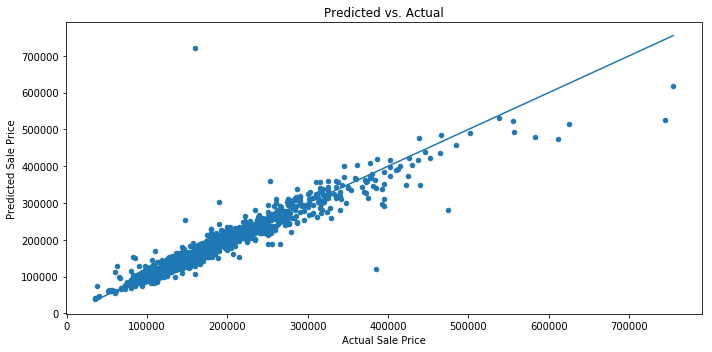

In [11]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

sess.close()
print(rmsle(y_train,pred_train))

### train 전체 데이터로 학습, test로 predict

In [12]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

###
batch_size = x_train.shape[0]

# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

j=0

for _ in range(step):
    j += 1
    
    batch_count = int(math.ceil(x_train.shape[0]/batch_size))
    for i in range(batch_count):
        batch_xs, batch_ys = x_train[batch_size * i : batch_size*(i+1)], y_train_log[batch_size * i : batch_size*(i+1)]
        sess.run(train_step,
                            feed_dict={x1: batch_xs, y_: batch_ys, keep_prob:keepout, lr : learning_rate})
        summary = sess.run(merged,
                            feed_dict={x1:  x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate})
        train_writer.add_summary(summary, j)
        if i % 300 == 0:
            print('step : {}, batch : {}'.format(j, i), end='\t')
            print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout, lr : learning_rate}))


print ("Testing model")
# Test trained model
y_test = pd.read_csv('./data/submission.csv', engine='python')
hidden1_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden1_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

train_writer.close()
sess.close()

Training

step : 1, batch : 0	loss : 121.263214
step : 2, batch : 0	loss : 99.53655
step : 3, batch : 0	loss : 78.45352
step : 4, batch : 0	loss : 60.70729
step : 5, batch : 0	loss : 44.81036
step : 6, batch : 0	loss : 30.132853
step : 7, batch : 0	loss : 18.450258
step : 8, batch : 0	loss : 9.9400835
step : 9, batch : 0	loss : 4.6442122
step : 10, batch : 0	loss : 3.0856524
step : 11, batch : 0	loss : 4.8666353
step : 12, batch : 0	loss : 9.250641
step : 13, batch : 0	loss : 13.57792
step : 14, batch : 0	loss : 16.348969
step : 15, batch : 0	loss : 17.72755
step : 16, batch : 0	loss : 15.655052
step : 17, batch : 0	loss : 12.991007
step : 18, batch : 0	loss : 9.79098
step : 19, batch : 0	loss : 7.819615
step : 20, batch : 0	loss : 4.983643
step : 21, batch : 0	loss : 3.5922098
step : 22, batch : 0	loss : 2.988895
step : 23, batch : 0	loss : 2.9333093
step : 24, batch : 0	loss : 3.3912692
step : 25, batch : 0	loss : 4.10597
step : 26, batch : 0	loss : 4.6345916
step : 27, batch : 0	los

step : 218, batch : 0	loss : 1.7604938
step : 219, batch : 0	loss : 1.7091664
step : 220, batch : 0	loss : 1.6716523
step : 221, batch : 0	loss : 1.7026854
step : 222, batch : 0	loss : 1.6874033
step : 223, batch : 0	loss : 1.7801687
step : 224, batch : 0	loss : 1.7111766
step : 225, batch : 0	loss : 1.6640757
step : 226, batch : 0	loss : 1.7902114
step : 227, batch : 0	loss : 1.64079
step : 228, batch : 0	loss : 1.6769103
step : 229, batch : 0	loss : 1.6467261
step : 230, batch : 0	loss : 1.6951435
step : 231, batch : 0	loss : 1.7096269
step : 232, batch : 0	loss : 1.5416967
step : 233, batch : 0	loss : 1.6237862
step : 234, batch : 0	loss : 1.701
step : 235, batch : 0	loss : 1.6453419
step : 236, batch : 0	loss : 1.64005
step : 237, batch : 0	loss : 1.6623957
step : 238, batch : 0	loss : 1.688094
step : 239, batch : 0	loss : 1.5766342
step : 240, batch : 0	loss : 1.6221482
step : 241, batch : 0	loss : 1.7352203
step : 242, batch : 0	loss : 1.6574711
step : 243, batch : 0	loss : 1.594

step : 429, batch : 0	loss : 1.3949033
step : 430, batch : 0	loss : 1.3737633
step : 431, batch : 0	loss : 1.4030585
step : 432, batch : 0	loss : 1.4349006
step : 433, batch : 0	loss : 1.419368
step : 434, batch : 0	loss : 1.4567988
step : 435, batch : 0	loss : 1.3446764
step : 436, batch : 0	loss : 1.368461
step : 437, batch : 0	loss : 1.4194344
step : 438, batch : 0	loss : 1.450781
step : 439, batch : 0	loss : 1.4662107
step : 440, batch : 0	loss : 1.3305558
step : 441, batch : 0	loss : 1.4322772
step : 442, batch : 0	loss : 1.4263636
step : 443, batch : 0	loss : 1.380029
step : 444, batch : 0	loss : 1.4926804
step : 445, batch : 0	loss : 1.4083072
step : 446, batch : 0	loss : 1.3992388
step : 447, batch : 0	loss : 1.3087505
step : 448, batch : 0	loss : 1.373993
step : 449, batch : 0	loss : 1.3584791
step : 450, batch : 0	loss : 1.4359204
step : 451, batch : 0	loss : 1.4414445
step : 452, batch : 0	loss : 1.3935304
step : 453, batch : 0	loss : 1.3825772
step : 454, batch : 0	loss : 1

step : 642, batch : 0	loss : 1.3036387
step : 643, batch : 0	loss : 1.2959979
step : 644, batch : 0	loss : 1.340118
step : 645, batch : 0	loss : 1.2249482
step : 646, batch : 0	loss : 1.2442675
step : 647, batch : 0	loss : 1.251647
step : 648, batch : 0	loss : 1.3096827
step : 649, batch : 0	loss : 1.3471323
step : 650, batch : 0	loss : 1.2338763
step : 651, batch : 0	loss : 1.3742323
step : 652, batch : 0	loss : 1.3338622
step : 653, batch : 0	loss : 1.2991136
step : 654, batch : 0	loss : 1.3116531
step : 655, batch : 0	loss : 1.3361498
step : 656, batch : 0	loss : 1.3026918
step : 657, batch : 0	loss : 1.2587181
step : 658, batch : 0	loss : 1.2669646
step : 659, batch : 0	loss : 1.3760165
step : 660, batch : 0	loss : 1.2245685
step : 661, batch : 0	loss : 1.2484621
step : 662, batch : 0	loss : 1.2602082
step : 663, batch : 0	loss : 1.2956882
step : 664, batch : 0	loss : 1.2675773
step : 665, batch : 0	loss : 1.3221002
step : 666, batch : 0	loss : 1.2923334
step : 667, batch : 0	loss 

step : 863, batch : 0	loss : 1.242847
step : 864, batch : 0	loss : 1.2468356
step : 865, batch : 0	loss : 1.303196
step : 866, batch : 0	loss : 1.2256045
step : 867, batch : 0	loss : 1.2346597
step : 868, batch : 0	loss : 1.2343078
step : 869, batch : 0	loss : 1.2512126
step : 870, batch : 0	loss : 1.232193
step : 871, batch : 0	loss : 1.1870478
step : 872, batch : 0	loss : 1.1662933
step : 873, batch : 0	loss : 1.2057118
step : 874, batch : 0	loss : 1.1833512
step : 875, batch : 0	loss : 1.3254849
step : 876, batch : 0	loss : 1.3244333
step : 877, batch : 0	loss : 1.2341818
step : 878, batch : 0	loss : 1.213007
step : 879, batch : 0	loss : 1.2538067
step : 880, batch : 0	loss : 1.2681435
step : 881, batch : 0	loss : 1.2536718
step : 882, batch : 0	loss : 1.1797624
step : 883, batch : 0	loss : 1.2071933
step : 884, batch : 0	loss : 1.2044042
step : 885, batch : 0	loss : 1.2243184
step : 886, batch : 0	loss : 1.2236238
step : 887, batch : 0	loss : 1.1784018
step : 888, batch : 0	loss : 

step : 1073, batch : 0	loss : 1.2779801
step : 1074, batch : 0	loss : 1.3200554
step : 1075, batch : 0	loss : 1.1972922
step : 1076, batch : 0	loss : 1.2234795
step : 1077, batch : 0	loss : 1.2208667
step : 1078, batch : 0	loss : 1.2188447
step : 1079, batch : 0	loss : 1.1244291
step : 1080, batch : 0	loss : 1.1525774
step : 1081, batch : 0	loss : 1.1579827
step : 1082, batch : 0	loss : 1.2535565
step : 1083, batch : 0	loss : 1.2806864
step : 1084, batch : 0	loss : 1.2527931
step : 1085, batch : 0	loss : 1.2289609
step : 1086, batch : 0	loss : 1.2507193
step : 1087, batch : 0	loss : 1.1869352
step : 1088, batch : 0	loss : 1.246443
step : 1089, batch : 0	loss : 1.1777742
step : 1090, batch : 0	loss : 1.2421111
step : 1091, batch : 0	loss : 1.1715822
step : 1092, batch : 0	loss : 1.2438213
step : 1093, batch : 0	loss : 1.2588537
step : 1094, batch : 0	loss : 1.1766446
step : 1095, batch : 0	loss : 1.2133048
step : 1096, batch : 0	loss : 1.1414993
step : 1097, batch : 0	loss : 1.1676997
s

step : 1290, batch : 0	loss : 1.1707897
step : 1291, batch : 0	loss : 1.2063147
step : 1292, batch : 0	loss : 1.1904736
step : 1293, batch : 0	loss : 1.2163991
step : 1294, batch : 0	loss : 1.105194
step : 1295, batch : 0	loss : 1.1486495
step : 1296, batch : 0	loss : 1.1841553
step : 1297, batch : 0	loss : 1.1204394
step : 1298, batch : 0	loss : 1.0975772
step : 1299, batch : 0	loss : 1.150151
step : 1300, batch : 0	loss : 1.1310868
step : 1301, batch : 0	loss : 1.1800328
step : 1302, batch : 0	loss : 1.145229
step : 1303, batch : 0	loss : 1.2303636
step : 1304, batch : 0	loss : 1.1769674
step : 1305, batch : 0	loss : 1.1802754
step : 1306, batch : 0	loss : 1.1659064
step : 1307, batch : 0	loss : 1.1891363
step : 1308, batch : 0	loss : 1.1672496
step : 1309, batch : 0	loss : 1.1732193
step : 1310, batch : 0	loss : 1.1701156
step : 1311, batch : 0	loss : 1.1590837
step : 1312, batch : 0	loss : 1.0614324
step : 1313, batch : 0	loss : 1.1144216
step : 1314, batch : 0	loss : 1.0895603
ste

step : 1500, batch : 0	loss : 1.147579
step : 1501, batch : 0	loss : 1.0023634
step : 1502, batch : 0	loss : 1.1280682
step : 1503, batch : 0	loss : 1.1277483
step : 1504, batch : 0	loss : 1.1142299
step : 1505, batch : 0	loss : 1.1351169
step : 1506, batch : 0	loss : 1.0987728
step : 1507, batch : 0	loss : 1.1116358
step : 1508, batch : 0	loss : 1.1210219
step : 1509, batch : 0	loss : 1.192173
step : 1510, batch : 0	loss : 1.1496842
step : 1511, batch : 0	loss : 1.1294137
step : 1512, batch : 0	loss : 1.1088905
step : 1513, batch : 0	loss : 1.0539638
step : 1514, batch : 0	loss : 1.1974318
step : 1515, batch : 0	loss : 1.1753428
step : 1516, batch : 0	loss : 1.1618292
step : 1517, batch : 0	loss : 1.1980013
step : 1518, batch : 0	loss : 1.1590159
step : 1519, batch : 0	loss : 1.0814654
step : 1520, batch : 0	loss : 1.19804
step : 1521, batch : 0	loss : 1.1134928
step : 1522, batch : 0	loss : 1.0640363
step : 1523, batch : 0	loss : 1.1534466
step : 1524, batch : 0	loss : 1.0572017
step

step : 1707, batch : 0	loss : 1.0527556
step : 1708, batch : 0	loss : 1.1154032
step : 1709, batch : 0	loss : 1.1208316
step : 1710, batch : 0	loss : 1.0641997
step : 1711, batch : 0	loss : 1.0583452
step : 1712, batch : 0	loss : 1.0695626
step : 1713, batch : 0	loss : 1.0309901
step : 1714, batch : 0	loss : 1.0629178
step : 1715, batch : 0	loss : 1.1624569
step : 1716, batch : 0	loss : 1.0705905
step : 1717, batch : 0	loss : 1.0553964
step : 1718, batch : 0	loss : 1.0249895
step : 1719, batch : 0	loss : 1.0962788
step : 1720, batch : 0	loss : 1.1186744
step : 1721, batch : 0	loss : 1.0333879
step : 1722, batch : 0	loss : 1.0418315
step : 1723, batch : 0	loss : 1.0531318
step : 1724, batch : 0	loss : 1.1008888
step : 1725, batch : 0	loss : 0.98619443
step : 1726, batch : 0	loss : 1.1104189
step : 1727, batch : 0	loss : 1.1060346
step : 1728, batch : 0	loss : 1.1112517
step : 1729, batch : 0	loss : 1.04444
step : 1730, batch : 0	loss : 1.0326089
step : 1731, batch : 0	loss : 1.1200215
s

step : 1917, batch : 0	loss : 1.0544827
step : 1918, batch : 0	loss : 1.0399894
step : 1919, batch : 0	loss : 1.0552218
step : 1920, batch : 0	loss : 1.0694472
step : 1921, batch : 0	loss : 1.0449604
step : 1922, batch : 0	loss : 1.0312303
step : 1923, batch : 0	loss : 1.064952
step : 1924, batch : 0	loss : 0.98428875
step : 1925, batch : 0	loss : 1.0273007
step : 1926, batch : 0	loss : 1.0032499
step : 1927, batch : 0	loss : 1.0787219
step : 1928, batch : 0	loss : 1.0806259
step : 1929, batch : 0	loss : 1.008958
step : 1930, batch : 0	loss : 1.0865171
step : 1931, batch : 0	loss : 1.0234123
step : 1932, batch : 0	loss : 1.0776684
step : 1933, batch : 0	loss : 1.0582143
step : 1934, batch : 0	loss : 1.031728
step : 1935, batch : 0	loss : 1.0787685
step : 1936, batch : 0	loss : 0.99609125
step : 1937, batch : 0	loss : 1.0729882
step : 1938, batch : 0	loss : 1.0798137
step : 1939, batch : 0	loss : 0.96622175
step : 1940, batch : 0	loss : 1.0741059
step : 1941, batch : 0	loss : 0.96583563

step : 2128, batch : 0	loss : 1.1160848
step : 2129, batch : 0	loss : 1.0149162
step : 2130, batch : 0	loss : 1.0818546
step : 2131, batch : 0	loss : 1.0164828
step : 2132, batch : 0	loss : 1.0616972
step : 2133, batch : 0	loss : 0.9513752
step : 2134, batch : 0	loss : 1.0485985
step : 2135, batch : 0	loss : 0.9606774
step : 2136, batch : 0	loss : 1.0341974
step : 2137, batch : 0	loss : 0.9507159
step : 2138, batch : 0	loss : 0.97164005
step : 2139, batch : 0	loss : 1.0236105
step : 2140, batch : 0	loss : 1.0866886
step : 2141, batch : 0	loss : 1.0176831
step : 2142, batch : 0	loss : 0.9621281
step : 2143, batch : 0	loss : 1.0269166
step : 2144, batch : 0	loss : 1.0145323
step : 2145, batch : 0	loss : 0.992802
step : 2146, batch : 0	loss : 0.988926
step : 2147, batch : 0	loss : 0.9910219
step : 2148, batch : 0	loss : 1.021654
step : 2149, batch : 0	loss : 1.0070109
step : 2150, batch : 0	loss : 1.0319148
step : 2151, batch : 0	loss : 0.9635093
step : 2152, batch : 0	loss : 1.0552841
st

step : 2338, batch : 0	loss : 0.93586123
step : 2339, batch : 0	loss : 1.0023425
step : 2340, batch : 0	loss : 0.9237611
step : 2341, batch : 0	loss : 1.009959
step : 2342, batch : 0	loss : 1.0098753
step : 2343, batch : 0	loss : 0.94670856
step : 2344, batch : 0	loss : 0.9068896
step : 2345, batch : 0	loss : 1.0350788
step : 2346, batch : 0	loss : 0.98263013
step : 2347, batch : 0	loss : 0.9598797
step : 2348, batch : 0	loss : 1.0054226
step : 2349, batch : 0	loss : 1.0107307
step : 2350, batch : 0	loss : 0.92958796
step : 2351, batch : 0	loss : 0.9320178
step : 2352, batch : 0	loss : 0.994864
step : 2353, batch : 0	loss : 0.9627279
step : 2354, batch : 0	loss : 0.9164823
step : 2355, batch : 0	loss : 1.0035034
step : 2356, batch : 0	loss : 0.9480484
step : 2357, batch : 0	loss : 0.95204085
step : 2358, batch : 0	loss : 1.0053511
step : 2359, batch : 0	loss : 0.9899768
step : 2360, batch : 0	loss : 0.9509338
step : 2361, batch : 0	loss : 1.0003742
step : 2362, batch : 0	loss : 0.90492

step : 2549, batch : 0	loss : 0.9480756
step : 2550, batch : 0	loss : 0.9628137
step : 2551, batch : 0	loss : 0.92905265
step : 2552, batch : 0	loss : 0.9452379
step : 2553, batch : 0	loss : 0.9384323
step : 2554, batch : 0	loss : 0.92670953
step : 2555, batch : 0	loss : 0.9935803
step : 2556, batch : 0	loss : 0.9961877
step : 2557, batch : 0	loss : 0.87227815
step : 2558, batch : 0	loss : 0.98085606
step : 2559, batch : 0	loss : 0.9224882
step : 2560, batch : 0	loss : 0.94753003
step : 2561, batch : 0	loss : 0.95901734
step : 2562, batch : 0	loss : 0.951783
step : 2563, batch : 0	loss : 0.9224062
step : 2564, batch : 0	loss : 0.9510489
step : 2565, batch : 0	loss : 0.93033725
step : 2566, batch : 0	loss : 0.91267824
step : 2567, batch : 0	loss : 0.9306668
step : 2568, batch : 0	loss : 0.914856
step : 2569, batch : 0	loss : 0.9722154
step : 2570, batch : 0	loss : 0.8989023
step : 2571, batch : 0	loss : 0.9273727
step : 2572, batch : 0	loss : 0.9186601
step : 2573, batch : 0	loss : 0.93

step : 2759, batch : 0	loss : 0.8655013
step : 2760, batch : 0	loss : 0.9106358
step : 2761, batch : 0	loss : 0.9087374
step : 2762, batch : 0	loss : 0.94965583
step : 2763, batch : 0	loss : 0.87017167
step : 2764, batch : 0	loss : 0.91255945
step : 2765, batch : 0	loss : 0.8657846
step : 2766, batch : 0	loss : 0.9014335
step : 2767, batch : 0	loss : 0.9339245
step : 2768, batch : 0	loss : 0.9075739
step : 2769, batch : 0	loss : 0.8663003
step : 2770, batch : 0	loss : 0.9212229
step : 2771, batch : 0	loss : 0.9269442
step : 2772, batch : 0	loss : 0.8412831
step : 2773, batch : 0	loss : 0.9375721
step : 2774, batch : 0	loss : 0.9141978
step : 2775, batch : 0	loss : 0.9323558
step : 2776, batch : 0	loss : 0.90930915
step : 2777, batch : 0	loss : 0.86004317
step : 2778, batch : 0	loss : 0.9321536
step : 2779, batch : 0	loss : 0.86450315
step : 2780, batch : 0	loss : 0.91362774
step : 2781, batch : 0	loss : 0.94150424
step : 2782, batch : 0	loss : 0.8675145
step : 2783, batch : 0	loss : 0.

step : 2969, batch : 0	loss : 0.9154318
step : 2970, batch : 0	loss : 0.89626753
step : 2971, batch : 0	loss : 0.8887629
step : 2972, batch : 0	loss : 0.82354
step : 2973, batch : 0	loss : 0.88162124
step : 2974, batch : 0	loss : 0.807235
step : 2975, batch : 0	loss : 0.85261303
step : 2976, batch : 0	loss : 0.9024356
step : 2977, batch : 0	loss : 0.8175524
step : 2978, batch : 0	loss : 0.84642327
step : 2979, batch : 0	loss : 0.8768174
step : 2980, batch : 0	loss : 0.74785626
step : 2981, batch : 0	loss : 0.82458925
step : 2982, batch : 0	loss : 0.8475211
step : 2983, batch : 0	loss : 0.88328797
step : 2984, batch : 0	loss : 0.8528576
step : 2985, batch : 0	loss : 0.9338532
step : 2986, batch : 0	loss : 0.76348764
step : 2987, batch : 0	loss : 0.84868073
step : 2988, batch : 0	loss : 0.8163743
step : 2989, batch : 0	loss : 0.78684676
step : 2990, batch : 0	loss : 0.87824404
step : 2991, batch : 0	loss : 0.8261254
step : 2992, batch : 0	loss : 0.8773862
step : 2993, batch : 0	loss : 0.

step : 3179, batch : 0	loss : 0.89183724
step : 3180, batch : 0	loss : 0.8643708
step : 3181, batch : 0	loss : 0.7806136
step : 3182, batch : 0	loss : 0.85046154
step : 3183, batch : 0	loss : 0.84590733
step : 3184, batch : 0	loss : 0.78161246
step : 3185, batch : 0	loss : 0.838846
step : 3186, batch : 0	loss : 0.8164297
step : 3187, batch : 0	loss : 0.77315164
step : 3188, batch : 0	loss : 0.77581245
step : 3189, batch : 0	loss : 0.817994
step : 3190, batch : 0	loss : 0.8204452
step : 3191, batch : 0	loss : 0.7680742
step : 3192, batch : 0	loss : 0.8619318
step : 3193, batch : 0	loss : 0.8506799
step : 3194, batch : 0	loss : 0.8447456
step : 3195, batch : 0	loss : 0.8235325
step : 3196, batch : 0	loss : 0.80671155
step : 3197, batch : 0	loss : 0.835637
step : 3198, batch : 0	loss : 0.81665933
step : 3199, batch : 0	loss : 0.8311454
step : 3200, batch : 0	loss : 0.7771444
step : 3201, batch : 0	loss : 0.8115448
step : 3202, batch : 0	loss : 0.78467184
step : 3203, batch : 0	loss : 0.82

step : 3389, batch : 0	loss : 0.76568973
step : 3390, batch : 0	loss : 0.7966845
step : 3391, batch : 0	loss : 0.7398033
step : 3392, batch : 0	loss : 0.783588
step : 3393, batch : 0	loss : 0.7676633
step : 3394, batch : 0	loss : 0.8182274
step : 3395, batch : 0	loss : 0.8741484
step : 3396, batch : 0	loss : 0.8175007
step : 3397, batch : 0	loss : 0.80046463
step : 3398, batch : 0	loss : 0.76944774
step : 3399, batch : 0	loss : 0.76589876
step : 3400, batch : 0	loss : 0.76318467
step : 3401, batch : 0	loss : 0.77639824
step : 3402, batch : 0	loss : 0.7748325
step : 3403, batch : 0	loss : 0.72268045
step : 3404, batch : 0	loss : 0.80693245
step : 3405, batch : 0	loss : 0.77515525
step : 3406, batch : 0	loss : 0.75347024
step : 3407, batch : 0	loss : 0.79961294
step : 3408, batch : 0	loss : 0.76734024
step : 3409, batch : 0	loss : 0.77459913
step : 3410, batch : 0	loss : 0.7872005
step : 3411, batch : 0	loss : 0.74637204
step : 3412, batch : 0	loss : 0.8050917
step : 3413, batch : 0	loss

step : 3592, batch : 0	loss : 0.77129596
step : 3593, batch : 0	loss : 0.7735474
step : 3594, batch : 0	loss : 0.73057616
step : 3595, batch : 0	loss : 0.70796734
step : 3596, batch : 0	loss : 0.7372213
step : 3597, batch : 0	loss : 0.75257945
step : 3598, batch : 0	loss : 0.7069838
step : 3599, batch : 0	loss : 0.74252677
step : 3600, batch : 0	loss : 0.70791435
step : 3601, batch : 0	loss : 0.7457876
step : 3602, batch : 0	loss : 0.6723466
step : 3603, batch : 0	loss : 0.66536915
step : 3604, batch : 0	loss : 0.7362332
step : 3605, batch : 0	loss : 0.7520343
step : 3606, batch : 0	loss : 0.730739
step : 3607, batch : 0	loss : 0.7290006
step : 3608, batch : 0	loss : 0.70050377
step : 3609, batch : 0	loss : 0.79367524
step : 3610, batch : 0	loss : 0.7213297
step : 3611, batch : 0	loss : 0.74468917
step : 3612, batch : 0	loss : 0.7493451
step : 3613, batch : 0	loss : 0.7084078
step : 3614, batch : 0	loss : 0.7202771
step : 3615, batch : 0	loss : 0.72414994
step : 3616, batch : 0	loss : 

step : 3798, batch : 0	loss : 0.6560098
step : 3799, batch : 0	loss : 0.6611268
step : 3800, batch : 0	loss : 0.6654323
step : 3801, batch : 0	loss : 0.6551366
step : 3802, batch : 0	loss : 0.690598
step : 3803, batch : 0	loss : 0.6555523
step : 3804, batch : 0	loss : 0.6595245
step : 3805, batch : 0	loss : 0.70355076
step : 3806, batch : 0	loss : 0.6897695
step : 3807, batch : 0	loss : 0.72521865
step : 3808, batch : 0	loss : 0.66006553
step : 3809, batch : 0	loss : 0.69227564
step : 3810, batch : 0	loss : 0.7155322
step : 3811, batch : 0	loss : 0.67276317
step : 3812, batch : 0	loss : 0.7362276
step : 3813, batch : 0	loss : 0.67906475
step : 3814, batch : 0	loss : 0.666131
step : 3815, batch : 0	loss : 0.7096815
step : 3816, batch : 0	loss : 0.6674179
step : 3817, batch : 0	loss : 0.6786629
step : 3818, batch : 0	loss : 0.70512354
step : 3819, batch : 0	loss : 0.7168783
step : 3820, batch : 0	loss : 0.66336405
step : 3821, batch : 0	loss : 0.7181979
step : 3822, batch : 0	loss : 0.69

step : 4002, batch : 0	loss : 0.6312132
step : 4003, batch : 0	loss : 0.64111125
step : 4004, batch : 0	loss : 0.6443589
step : 4005, batch : 0	loss : 0.659236
step : 4006, batch : 0	loss : 0.6660387
step : 4007, batch : 0	loss : 0.6920387
step : 4008, batch : 0	loss : 0.646526
step : 4009, batch : 0	loss : 0.63462454
step : 4010, batch : 0	loss : 0.64538103
step : 4011, batch : 0	loss : 0.64800906
step : 4012, batch : 0	loss : 0.6465006
step : 4013, batch : 0	loss : 0.6510809
step : 4014, batch : 0	loss : 0.68004704
step : 4015, batch : 0	loss : 0.68846154
step : 4016, batch : 0	loss : 0.63287836
step : 4017, batch : 0	loss : 0.6354775
step : 4018, batch : 0	loss : 0.62777764
step : 4019, batch : 0	loss : 0.65741867
step : 4020, batch : 0	loss : 0.6538972
step : 4021, batch : 0	loss : 0.68030244
step : 4022, batch : 0	loss : 0.65923387
step : 4023, batch : 0	loss : 0.62435573
step : 4024, batch : 0	loss : 0.6632828
step : 4025, batch : 0	loss : 0.6578224
step : 4026, batch : 0	loss : 

step : 4209, batch : 0	loss : 0.6261366
step : 4210, batch : 0	loss : 0.6117203
step : 4211, batch : 0	loss : 0.5833967
step : 4212, batch : 0	loss : 0.6174672
step : 4213, batch : 0	loss : 0.6379327
step : 4214, batch : 0	loss : 0.6311437
step : 4215, batch : 0	loss : 0.60642236
step : 4216, batch : 0	loss : 0.6501643
step : 4217, batch : 0	loss : 0.5999267
step : 4218, batch : 0	loss : 0.6200082
step : 4219, batch : 0	loss : 0.5722358
step : 4220, batch : 0	loss : 0.6159134
step : 4221, batch : 0	loss : 0.60814565
step : 4222, batch : 0	loss : 0.6263708
step : 4223, batch : 0	loss : 0.6147692
step : 4224, batch : 0	loss : 0.6047226
step : 4225, batch : 0	loss : 0.6191791
step : 4226, batch : 0	loss : 0.5903572
step : 4227, batch : 0	loss : 0.610608
step : 4228, batch : 0	loss : 0.57167625
step : 4229, batch : 0	loss : 0.5703684
step : 4230, batch : 0	loss : 0.580032
step : 4231, batch : 0	loss : 0.60285413
step : 4232, batch : 0	loss : 0.5672789
step : 4233, batch : 0	loss : 0.567676

step : 4426, batch : 0	loss : 0.5335289
step : 4427, batch : 0	loss : 0.5907124
step : 4428, batch : 0	loss : 0.57137513
step : 4429, batch : 0	loss : 0.5266725
step : 4430, batch : 0	loss : 0.55995995
step : 4431, batch : 0	loss : 0.55765074
step : 4432, batch : 0	loss : 0.5416785
step : 4433, batch : 0	loss : 0.56252605
step : 4434, batch : 0	loss : 0.57948214
step : 4435, batch : 0	loss : 0.5530567
step : 4436, batch : 0	loss : 0.56360584
step : 4437, batch : 0	loss : 0.5881669
step : 4438, batch : 0	loss : 0.5419419
step : 4439, batch : 0	loss : 0.5303794
step : 4440, batch : 0	loss : 0.55404216
step : 4441, batch : 0	loss : 0.5860428
step : 4442, batch : 0	loss : 0.56272393
step : 4443, batch : 0	loss : 0.5461062
step : 4444, batch : 0	loss : 0.576618
step : 4445, batch : 0	loss : 0.54642475
step : 4446, batch : 0	loss : 0.5567081
step : 4447, batch : 0	loss : 0.5732837
step : 4448, batch : 0	loss : 0.5603903
step : 4449, batch : 0	loss : 0.5559608
step : 4450, batch : 0	loss : 0.

step : 4639, batch : 0	loss : 0.47393838
step : 4640, batch : 0	loss : 0.5702546
step : 4641, batch : 0	loss : 0.5481315
step : 4642, batch : 0	loss : 0.5442291
step : 4643, batch : 0	loss : 0.5551455
step : 4644, batch : 0	loss : 0.5312348
step : 4645, batch : 0	loss : 0.5348724
step : 4646, batch : 0	loss : 0.55320996
step : 4647, batch : 0	loss : 0.53081095
step : 4648, batch : 0	loss : 0.5251637
step : 4649, batch : 0	loss : 0.5094127
step : 4650, batch : 0	loss : 0.5483144
step : 4651, batch : 0	loss : 0.5015797
step : 4652, batch : 0	loss : 0.49804017
step : 4653, batch : 0	loss : 0.5556236
step : 4654, batch : 0	loss : 0.49645883
step : 4655, batch : 0	loss : 0.5020089
step : 4656, batch : 0	loss : 0.5476476
step : 4657, batch : 0	loss : 0.49534038
step : 4658, batch : 0	loss : 0.5097386
step : 4659, batch : 0	loss : 0.5443122
step : 4660, batch : 0	loss : 0.5430718
step : 4661, batch : 0	loss : 0.52359164
step : 4662, batch : 0	loss : 0.53455263
step : 4663, batch : 0	loss : 0.

step : 4843, batch : 0	loss : 0.48828095
step : 4844, batch : 0	loss : 0.49342313
step : 4845, batch : 0	loss : 0.5168674
step : 4846, batch : 0	loss : 0.47793317
step : 4847, batch : 0	loss : 0.48546824
step : 4848, batch : 0	loss : 0.49137667
step : 4849, batch : 0	loss : 0.51954293
step : 4850, batch : 0	loss : 0.5335616
step : 4851, batch : 0	loss : 0.47611898
step : 4852, batch : 0	loss : 0.5331024
step : 4853, batch : 0	loss : 0.5107933
step : 4854, batch : 0	loss : 0.5192089
step : 4855, batch : 0	loss : 0.4833453
step : 4856, batch : 0	loss : 0.49939325
step : 4857, batch : 0	loss : 0.52162945
step : 4858, batch : 0	loss : 0.5384534
step : 4859, batch : 0	loss : 0.46046135
step : 4860, batch : 0	loss : 0.5159189
step : 4861, batch : 0	loss : 0.5167243
step : 4862, batch : 0	loss : 0.47953996
step : 4863, batch : 0	loss : 0.49230957
step : 4864, batch : 0	loss : 0.4687339
step : 4865, batch : 0	loss : 0.47572923
step : 4866, batch : 0	loss : 0.47932306
step : 4867, batch : 0	los

step : 5049, batch : 0	loss : 0.4329068
step : 5050, batch : 0	loss : 0.453126
step : 5051, batch : 0	loss : 0.43994513
step : 5052, batch : 0	loss : 0.4691598
step : 5053, batch : 0	loss : 0.49227846
step : 5054, batch : 0	loss : 0.46089467
step : 5055, batch : 0	loss : 0.4939951
step : 5056, batch : 0	loss : 0.4569733
step : 5057, batch : 0	loss : 0.45603934
step : 5058, batch : 0	loss : 0.45323578
step : 5059, batch : 0	loss : 0.47062767
step : 5060, batch : 0	loss : 0.46171883
step : 5061, batch : 0	loss : 0.46372768
step : 5062, batch : 0	loss : 0.45960853
step : 5063, batch : 0	loss : 0.44801673
step : 5064, batch : 0	loss : 0.47398838
step : 5065, batch : 0	loss : 0.458184
step : 5066, batch : 0	loss : 0.43908736
step : 5067, batch : 0	loss : 0.4346238
step : 5068, batch : 0	loss : 0.44176924
step : 5069, batch : 0	loss : 0.4406104
step : 5070, batch : 0	loss : 0.46034703
step : 5071, batch : 0	loss : 0.4348027
step : 5072, batch : 0	loss : 0.45231873
step : 5073, batch : 0	loss

step : 5257, batch : 0	loss : 0.40732074
step : 5258, batch : 0	loss : 0.40197536
step : 5259, batch : 0	loss : 0.40663072
step : 5260, batch : 0	loss : 0.43370628
step : 5261, batch : 0	loss : 0.42840096
step : 5262, batch : 0	loss : 0.41390356
step : 5263, batch : 0	loss : 0.42479244
step : 5264, batch : 0	loss : 0.4164352
step : 5265, batch : 0	loss : 0.4386449
step : 5266, batch : 0	loss : 0.39644772
step : 5267, batch : 0	loss : 0.4041489
step : 5268, batch : 0	loss : 0.42997602
step : 5269, batch : 0	loss : 0.41728473
step : 5270, batch : 0	loss : 0.4218215
step : 5271, batch : 0	loss : 0.4061213
step : 5272, batch : 0	loss : 0.42085657
step : 5273, batch : 0	loss : 0.40323272
step : 5274, batch : 0	loss : 0.41015255
step : 5275, batch : 0	loss : 0.43302122
step : 5276, batch : 0	loss : 0.42554906
step : 5277, batch : 0	loss : 0.42964935
step : 5278, batch : 0	loss : 0.41059634
step : 5279, batch : 0	loss : 0.45354012
step : 5280, batch : 0	loss : 0.4303928
step : 5281, batch : 0

step : 5461, batch : 0	loss : 0.392015
step : 5462, batch : 0	loss : 0.37195724
step : 5463, batch : 0	loss : 0.35903177
step : 5464, batch : 0	loss : 0.39318287
step : 5465, batch : 0	loss : 0.39953378
step : 5466, batch : 0	loss : 0.3670899
step : 5467, batch : 0	loss : 0.37401888
step : 5468, batch : 0	loss : 0.38131183
step : 5469, batch : 0	loss : 0.3809834
step : 5470, batch : 0	loss : 0.37847495
step : 5471, batch : 0	loss : 0.37233335
step : 5472, batch : 0	loss : 0.39752713
step : 5473, batch : 0	loss : 0.38921127
step : 5474, batch : 0	loss : 0.4002463
step : 5475, batch : 0	loss : 0.36916557
step : 5476, batch : 0	loss : 0.38545895
step : 5477, batch : 0	loss : 0.3747943
step : 5478, batch : 0	loss : 0.37247908
step : 5479, batch : 0	loss : 0.38807532
step : 5480, batch : 0	loss : 0.38468948
step : 5481, batch : 0	loss : 0.39353263
step : 5482, batch : 0	loss : 0.3876613
step : 5483, batch : 0	loss : 0.37505874
step : 5484, batch : 0	loss : 0.36447564
step : 5485, batch : 0	

step : 5675, batch : 0	loss : 0.35430846
step : 5676, batch : 0	loss : 0.35479122
step : 5677, batch : 0	loss : 0.36043474
step : 5678, batch : 0	loss : 0.35451284
step : 5679, batch : 0	loss : 0.34769082
step : 5680, batch : 0	loss : 0.341915
step : 5681, batch : 0	loss : 0.34418052
step : 5682, batch : 0	loss : 0.36500478
step : 5683, batch : 0	loss : 0.3387192
step : 5684, batch : 0	loss : 0.34305677
step : 5685, batch : 0	loss : 0.35961002
step : 5686, batch : 0	loss : 0.3545759
step : 5687, batch : 0	loss : 0.33986333
step : 5688, batch : 0	loss : 0.3531441
step : 5689, batch : 0	loss : 0.34125963
step : 5690, batch : 0	loss : 0.34541553
step : 5691, batch : 0	loss : 0.3339367
step : 5692, batch : 0	loss : 0.3300711
step : 5693, batch : 0	loss : 0.32671195
step : 5694, batch : 0	loss : 0.36806875
step : 5695, batch : 0	loss : 0.32252735
step : 5696, batch : 0	loss : 0.3519
step : 5697, batch : 0	loss : 0.34188464
step : 5698, batch : 0	loss : 0.36670205
step : 5699, batch : 0	loss

step : 5887, batch : 0	loss : 0.3273223
step : 5888, batch : 0	loss : 0.312268
step : 5889, batch : 0	loss : 0.29667476
step : 5890, batch : 0	loss : 0.30802447
step : 5891, batch : 0	loss : 0.3145847
step : 5892, batch : 0	loss : 0.29685813
step : 5893, batch : 0	loss : 0.3478308
step : 5894, batch : 0	loss : 0.30534607
step : 5895, batch : 0	loss : 0.30750817
step : 5896, batch : 0	loss : 0.34865165
step : 5897, batch : 0	loss : 0.32562828
step : 5898, batch : 0	loss : 0.30510217
step : 5899, batch : 0	loss : 0.33534947
step : 5900, batch : 0	loss : 0.31590068
step : 5901, batch : 0	loss : 0.29639715
step : 5902, batch : 0	loss : 0.3157989
step : 5903, batch : 0	loss : 0.30613443
step : 5904, batch : 0	loss : 0.33241233
step : 5905, batch : 0	loss : 0.27953643
step : 5906, batch : 0	loss : 0.31069338
step : 5907, batch : 0	loss : 0.2977381
step : 5908, batch : 0	loss : 0.29077902
step : 5909, batch : 0	loss : 0.31648067
step : 5910, batch : 0	loss : 0.3108116
step : 5911, batch : 0	l

step : 6102, batch : 0	loss : 0.2923681
step : 6103, batch : 0	loss : 0.28373882
step : 6104, batch : 0	loss : 0.2852559
step : 6105, batch : 0	loss : 0.29560104
step : 6106, batch : 0	loss : 0.28814092
step : 6107, batch : 0	loss : 0.28661874
step : 6108, batch : 0	loss : 0.27841043
step : 6109, batch : 0	loss : 0.29088312
step : 6110, batch : 0	loss : 0.2866475
step : 6111, batch : 0	loss : 0.27247402
step : 6112, batch : 0	loss : 0.272827
step : 6113, batch : 0	loss : 0.2884543
step : 6114, batch : 0	loss : 0.28460947
step : 6115, batch : 0	loss : 0.27839106
step : 6116, batch : 0	loss : 0.27266282
step : 6117, batch : 0	loss : 0.27545324
step : 6118, batch : 0	loss : 0.2757658
step : 6119, batch : 0	loss : 0.27428055
step : 6120, batch : 0	loss : 0.27940866
step : 6121, batch : 0	loss : 0.2878779
step : 6122, batch : 0	loss : 0.27542445
step : 6123, batch : 0	loss : 0.25510788
step : 6124, batch : 0	loss : 0.27708936
step : 6125, batch : 0	loss : 0.25590178
step : 6126, batch : 0	l

step : 6308, batch : 0	loss : 0.2598684
step : 6309, batch : 0	loss : 0.25474757
step : 6310, batch : 0	loss : 0.26367104
step : 6311, batch : 0	loss : 0.25166687
step : 6312, batch : 0	loss : 0.24152768
step : 6313, batch : 0	loss : 0.25060844
step : 6314, batch : 0	loss : 0.25085187
step : 6315, batch : 0	loss : 0.25635794
step : 6316, batch : 0	loss : 0.2461238
step : 6317, batch : 0	loss : 0.2433023
step : 6318, batch : 0	loss : 0.25654054
step : 6319, batch : 0	loss : 0.25512734
step : 6320, batch : 0	loss : 0.24523328
step : 6321, batch : 0	loss : 0.26530823
step : 6322, batch : 0	loss : 0.24823226
step : 6323, batch : 0	loss : 0.2588803
step : 6324, batch : 0	loss : 0.2573268
step : 6325, batch : 0	loss : 0.2612272
step : 6326, batch : 0	loss : 0.24633399
step : 6327, batch : 0	loss : 0.2653643
step : 6328, batch : 0	loss : 0.26003316
step : 6329, batch : 0	loss : 0.25696158
step : 6330, batch : 0	loss : 0.2360576
step : 6331, batch : 0	loss : 0.24634472
step : 6332, batch : 0	l

step : 6513, batch : 0	loss : 0.21033773
step : 6514, batch : 0	loss : 0.22728424
step : 6515, batch : 0	loss : 0.23666035
step : 6516, batch : 0	loss : 0.23440568
step : 6517, batch : 0	loss : 0.21743755
step : 6518, batch : 0	loss : 0.22498237
step : 6519, batch : 0	loss : 0.22238134
step : 6520, batch : 0	loss : 0.22443113
step : 6521, batch : 0	loss : 0.21155536
step : 6522, batch : 0	loss : 0.23033734
step : 6523, batch : 0	loss : 0.22413586
step : 6524, batch : 0	loss : 0.22533485
step : 6525, batch : 0	loss : 0.22069179
step : 6526, batch : 0	loss : 0.22040418
step : 6527, batch : 0	loss : 0.21683298
step : 6528, batch : 0	loss : 0.22190982
step : 6529, batch : 0	loss : 0.23659042
step : 6530, batch : 0	loss : 0.22562163
step : 6531, batch : 0	loss : 0.21314467
step : 6532, batch : 0	loss : 0.22988176
step : 6533, batch : 0	loss : 0.22530758
step : 6534, batch : 0	loss : 0.21783577
step : 6535, batch : 0	loss : 0.23739493
step : 6536, batch : 0	loss : 0.23896351
step : 6537, bat

step : 6720, batch : 0	loss : 0.19651689
step : 6721, batch : 0	loss : 0.20308892
step : 6722, batch : 0	loss : 0.2151051
step : 6723, batch : 0	loss : 0.18869132
step : 6724, batch : 0	loss : 0.20942461
step : 6725, batch : 0	loss : 0.20157686
step : 6726, batch : 0	loss : 0.19675341
step : 6727, batch : 0	loss : 0.21594357
step : 6728, batch : 0	loss : 0.2055893
step : 6729, batch : 0	loss : 0.21194905
step : 6730, batch : 0	loss : 0.18713322
step : 6731, batch : 0	loss : 0.19205026
step : 6732, batch : 0	loss : 0.18967643
step : 6733, batch : 0	loss : 0.19209656
step : 6734, batch : 0	loss : 0.20232917
step : 6735, batch : 0	loss : 0.18982995
step : 6736, batch : 0	loss : 0.20042396
step : 6737, batch : 0	loss : 0.20518166
step : 6738, batch : 0	loss : 0.20209506
step : 6739, batch : 0	loss : 0.19265707
step : 6740, batch : 0	loss : 0.19875228
step : 6741, batch : 0	loss : 0.20023666
step : 6742, batch : 0	loss : 0.20690995
step : 6743, batch : 0	loss : 0.19234361
step : 6744, batch

step : 6927, batch : 0	loss : 0.18173707
step : 6928, batch : 0	loss : 0.17599855
step : 6929, batch : 0	loss : 0.18081816
step : 6930, batch : 0	loss : 0.17358871
step : 6931, batch : 0	loss : 0.17226021
step : 6932, batch : 0	loss : 0.18822138
step : 6933, batch : 0	loss : 0.16877289
step : 6934, batch : 0	loss : 0.18322791
step : 6935, batch : 0	loss : 0.18584955
step : 6936, batch : 0	loss : 0.17418544
step : 6937, batch : 0	loss : 0.17121398
step : 6938, batch : 0	loss : 0.17588326
step : 6939, batch : 0	loss : 0.1742951
step : 6940, batch : 0	loss : 0.1894484
step : 6941, batch : 0	loss : 0.18169494
step : 6942, batch : 0	loss : 0.17553654
step : 6943, batch : 0	loss : 0.17776324
step : 6944, batch : 0	loss : 0.17016663
step : 6945, batch : 0	loss : 0.1852459
step : 6946, batch : 0	loss : 0.17577492
step : 6947, batch : 0	loss : 0.17597751
step : 6948, batch : 0	loss : 0.17072295
step : 6949, batch : 0	loss : 0.17591012
step : 6950, batch : 0	loss : 0.16945246
step : 6951, batch 

step : 7135, batch : 0	loss : 0.15556572
step : 7136, batch : 0	loss : 0.16306555
step : 7137, batch : 0	loss : 0.16799547
step : 7138, batch : 0	loss : 0.15901852
step : 7139, batch : 0	loss : 0.15743566
step : 7140, batch : 0	loss : 0.164235
step : 7141, batch : 0	loss : 0.16461864
step : 7142, batch : 0	loss : 0.1578208
step : 7143, batch : 0	loss : 0.14741787
step : 7144, batch : 0	loss : 0.1539913
step : 7145, batch : 0	loss : 0.15781924
step : 7146, batch : 0	loss : 0.1538655
step : 7147, batch : 0	loss : 0.15458097
step : 7148, batch : 0	loss : 0.16724293
step : 7149, batch : 0	loss : 0.1547547
step : 7150, batch : 0	loss : 0.16125286
step : 7151, batch : 0	loss : 0.15459053
step : 7152, batch : 0	loss : 0.152057
step : 7153, batch : 0	loss : 0.15192483
step : 7154, batch : 0	loss : 0.15293176
step : 7155, batch : 0	loss : 0.15422
step : 7156, batch : 0	loss : 0.159944
step : 7157, batch : 0	loss : 0.14680026
step : 7158, batch : 0	loss : 0.15438144
step : 7159, batch : 0	loss :

step : 7342, batch : 0	loss : 0.13544834
step : 7343, batch : 0	loss : 0.14056231
step : 7344, batch : 0	loss : 0.12733035
step : 7345, batch : 0	loss : 0.13282253
step : 7346, batch : 0	loss : 0.13413975
step : 7347, batch : 0	loss : 0.14642827
step : 7348, batch : 0	loss : 0.13696493
step : 7349, batch : 0	loss : 0.1388404
step : 7350, batch : 0	loss : 0.13559327
step : 7351, batch : 0	loss : 0.12819676
step : 7352, batch : 0	loss : 0.13111338
step : 7353, batch : 0	loss : 0.13994314
step : 7354, batch : 0	loss : 0.14965239
step : 7355, batch : 0	loss : 0.13633457
step : 7356, batch : 0	loss : 0.14566757
step : 7357, batch : 0	loss : 0.14142181
step : 7358, batch : 0	loss : 0.13832507
step : 7359, batch : 0	loss : 0.13675638
step : 7360, batch : 0	loss : 0.14016724
step : 7361, batch : 0	loss : 0.13651516
step : 7362, batch : 0	loss : 0.13177836
step : 7363, batch : 0	loss : 0.14152454
step : 7364, batch : 0	loss : 0.14906655
step : 7365, batch : 0	loss : 0.13974169
step : 7366, batc

step : 7544, batch : 0	loss : 0.11927953
step : 7545, batch : 0	loss : 0.1153673
step : 7546, batch : 0	loss : 0.11921352
step : 7547, batch : 0	loss : 0.117348425
step : 7548, batch : 0	loss : 0.12375429
step : 7549, batch : 0	loss : 0.108223185
step : 7550, batch : 0	loss : 0.11404784
step : 7551, batch : 0	loss : 0.11459162
step : 7552, batch : 0	loss : 0.11551364
step : 7553, batch : 0	loss : 0.11843597
step : 7554, batch : 0	loss : 0.11362875
step : 7555, batch : 0	loss : 0.112372674
step : 7556, batch : 0	loss : 0.12220739
step : 7557, batch : 0	loss : 0.11322745
step : 7558, batch : 0	loss : 0.11915568
step : 7559, batch : 0	loss : 0.12598889
step : 7560, batch : 0	loss : 0.10961296
step : 7561, batch : 0	loss : 0.11763659
step : 7562, batch : 0	loss : 0.12629996
step : 7563, batch : 0	loss : 0.12391777
step : 7564, batch : 0	loss : 0.11550274
step : 7565, batch : 0	loss : 0.110085584
step : 7566, batch : 0	loss : 0.122522995
step : 7567, batch : 0	loss : 0.11592739
step : 7568,

step : 7754, batch : 0	loss : 0.107465684
step : 7755, batch : 0	loss : 0.10464167
step : 7756, batch : 0	loss : 0.10604669
step : 7757, batch : 0	loss : 0.11210208
step : 7758, batch : 0	loss : 0.107457966
step : 7759, batch : 0	loss : 0.10597716
step : 7760, batch : 0	loss : 0.11126994
step : 7761, batch : 0	loss : 0.098072104
step : 7762, batch : 0	loss : 0.11075596
step : 7763, batch : 0	loss : 0.10002488
step : 7764, batch : 0	loss : 0.1101537
step : 7765, batch : 0	loss : 0.101399705
step : 7766, batch : 0	loss : 0.099598914
step : 7767, batch : 0	loss : 0.1092513
step : 7768, batch : 0	loss : 0.104583405
step : 7769, batch : 0	loss : 0.11119629
step : 7770, batch : 0	loss : 0.098408826
step : 7771, batch : 0	loss : 0.11106469
step : 7772, batch : 0	loss : 0.10519821
step : 7773, batch : 0	loss : 0.104581505
step : 7774, batch : 0	loss : 0.10135232
step : 7775, batch : 0	loss : 0.0990214
step : 7776, batch : 0	loss : 0.09814935
step : 7777, batch : 0	loss : 0.09976532
step : 7778

step : 7966, batch : 0	loss : 0.09238264
step : 7967, batch : 0	loss : 0.087501325
step : 7968, batch : 0	loss : 0.084065
step : 7969, batch : 0	loss : 0.08823541
step : 7970, batch : 0	loss : 0.08963231
step : 7971, batch : 0	loss : 0.08854618
step : 7972, batch : 0	loss : 0.084920146
step : 7973, batch : 0	loss : 0.088278264
step : 7974, batch : 0	loss : 0.091374144
step : 7975, batch : 0	loss : 0.086428754
step : 7976, batch : 0	loss : 0.083920956
step : 7977, batch : 0	loss : 0.08789
step : 7978, batch : 0	loss : 0.09344855
step : 7979, batch : 0	loss : 0.0858001
step : 7980, batch : 0	loss : 0.094086945
step : 7981, batch : 0	loss : 0.08738118
step : 7982, batch : 0	loss : 0.09069049
step : 7983, batch : 0	loss : 0.08794
step : 7984, batch : 0	loss : 0.08435342
step : 7985, batch : 0	loss : 0.0863474
step : 7986, batch : 0	loss : 0.08567229
step : 7987, batch : 0	loss : 0.093390524
step : 7988, batch : 0	loss : 0.08621821
step : 7989, batch : 0	loss : 0.09212651
step : 7990, batch

step : 8176, batch : 0	loss : 0.07473987
step : 8177, batch : 0	loss : 0.074769154
step : 8178, batch : 0	loss : 0.07321753
step : 8179, batch : 0	loss : 0.07636374
step : 8180, batch : 0	loss : 0.07420395
step : 8181, batch : 0	loss : 0.072182
step : 8182, batch : 0	loss : 0.0751956
step : 8183, batch : 0	loss : 0.07272536
step : 8184, batch : 0	loss : 0.07696469
step : 8185, batch : 0	loss : 0.07105306
step : 8186, batch : 0	loss : 0.07551487
step : 8187, batch : 0	loss : 0.07365024
step : 8188, batch : 0	loss : 0.07503859
step : 8189, batch : 0	loss : 0.0792068
step : 8190, batch : 0	loss : 0.0749371
step : 8191, batch : 0	loss : 0.07492261
step : 8192, batch : 0	loss : 0.08131461
step : 8193, batch : 0	loss : 0.07935302
step : 8194, batch : 0	loss : 0.07639135
step : 8195, batch : 0	loss : 0.073908746
step : 8196, batch : 0	loss : 0.08092838
step : 8197, batch : 0	loss : 0.07618029
step : 8198, batch : 0	loss : 0.07146602
step : 8199, batch : 0	loss : 0.079917155
step : 8200, batch

step : 8387, batch : 0	loss : 0.067094564
step : 8388, batch : 0	loss : 0.065235205
step : 8389, batch : 0	loss : 0.06388915
step : 8390, batch : 0	loss : 0.06809185
step : 8391, batch : 0	loss : 0.065010086
step : 8392, batch : 0	loss : 0.069883764
step : 8393, batch : 0	loss : 0.062427472
step : 8394, batch : 0	loss : 0.0649556
step : 8395, batch : 0	loss : 0.06369707
step : 8396, batch : 0	loss : 0.06452625
step : 8397, batch : 0	loss : 0.06554212
step : 8398, batch : 0	loss : 0.064889774
step : 8399, batch : 0	loss : 0.061346114
step : 8400, batch : 0	loss : 0.06476211
step : 8401, batch : 0	loss : 0.063569896
step : 8402, batch : 0	loss : 0.06469887
step : 8403, batch : 0	loss : 0.06280216
step : 8404, batch : 0	loss : 0.060823493
step : 8405, batch : 0	loss : 0.06465918
step : 8406, batch : 0	loss : 0.064923525
step : 8407, batch : 0	loss : 0.060740773
step : 8408, batch : 0	loss : 0.06331222
step : 8409, batch : 0	loss : 0.06536663
step : 8410, batch : 0	loss : 0.057830937
step 

step : 8598, batch : 0	loss : 0.05424783
step : 8599, batch : 0	loss : 0.056061376
step : 8600, batch : 0	loss : 0.052248538
step : 8601, batch : 0	loss : 0.057671294
step : 8602, batch : 0	loss : 0.052331407
step : 8603, batch : 0	loss : 0.05398372
step : 8604, batch : 0	loss : 0.056162138
step : 8605, batch : 0	loss : 0.05430422
step : 8606, batch : 0	loss : 0.054111827
step : 8607, batch : 0	loss : 0.055328637
step : 8608, batch : 0	loss : 0.057158582
step : 8609, batch : 0	loss : 0.056537546
step : 8610, batch : 0	loss : 0.052771937
step : 8611, batch : 0	loss : 0.054234605
step : 8612, batch : 0	loss : 0.052729268
step : 8613, batch : 0	loss : 0.05991808
step : 8614, batch : 0	loss : 0.055648185
step : 8615, batch : 0	loss : 0.05270979
step : 8616, batch : 0	loss : 0.053694148
step : 8617, batch : 0	loss : 0.056019288
step : 8618, batch : 0	loss : 0.049578525
step : 8619, batch : 0	loss : 0.050483365
step : 8620, batch : 0	loss : 0.051465876
step : 8621, batch : 0	loss : 0.0530337

step : 8801, batch : 0	loss : 0.04671302
step : 8802, batch : 0	loss : 0.04760846
step : 8803, batch : 0	loss : 0.045120914
step : 8804, batch : 0	loss : 0.04546683
step : 8805, batch : 0	loss : 0.047942854
step : 8806, batch : 0	loss : 0.044449873
step : 8807, batch : 0	loss : 0.049978517
step : 8808, batch : 0	loss : 0.048828375
step : 8809, batch : 0	loss : 0.0444517
step : 8810, batch : 0	loss : 0.046277978
step : 8811, batch : 0	loss : 0.045284092
step : 8812, batch : 0	loss : 0.04416942
step : 8813, batch : 0	loss : 0.051527362
step : 8814, batch : 0	loss : 0.047935475
step : 8815, batch : 0	loss : 0.04926012
step : 8816, batch : 0	loss : 0.050813973
step : 8817, batch : 0	loss : 0.04174046
step : 8818, batch : 0	loss : 0.045107804
step : 8819, batch : 0	loss : 0.04610533
step : 8820, batch : 0	loss : 0.047345627
step : 8821, batch : 0	loss : 0.044900317
step : 8822, batch : 0	loss : 0.049320463
step : 8823, batch : 0	loss : 0.042464636
step : 8824, batch : 0	loss : 0.045313485
s

step : 9009, batch : 0	loss : 0.038122676
step : 9010, batch : 0	loss : 0.037814807
step : 9011, batch : 0	loss : 0.03746456
step : 9012, batch : 0	loss : 0.038038652
step : 9013, batch : 0	loss : 0.038766813
step : 9014, batch : 0	loss : 0.037533503
step : 9015, batch : 0	loss : 0.03857551
step : 9016, batch : 0	loss : 0.03858363
step : 9017, batch : 0	loss : 0.035972334
step : 9018, batch : 0	loss : 0.038723182
step : 9019, batch : 0	loss : 0.040128242
step : 9020, batch : 0	loss : 0.03608553
step : 9021, batch : 0	loss : 0.03616792
step : 9022, batch : 0	loss : 0.041338403
step : 9023, batch : 0	loss : 0.040859934
step : 9024, batch : 0	loss : 0.037186604
step : 9025, batch : 0	loss : 0.039960437
step : 9026, batch : 0	loss : 0.03822313
step : 9027, batch : 0	loss : 0.040608957
step : 9028, batch : 0	loss : 0.040111046
step : 9029, batch : 0	loss : 0.03439519
step : 9030, batch : 0	loss : 0.036588024
step : 9031, batch : 0	loss : 0.038928308
step : 9032, batch : 0	loss : 0.037879333

step : 9217, batch : 0	loss : 0.03060495
step : 9218, batch : 0	loss : 0.031667102
step : 9219, batch : 0	loss : 0.03143255
step : 9220, batch : 0	loss : 0.032444242
step : 9221, batch : 0	loss : 0.030540122
step : 9222, batch : 0	loss : 0.03215263
step : 9223, batch : 0	loss : 0.033393938
step : 9224, batch : 0	loss : 0.03158833
step : 9225, batch : 0	loss : 0.030863136
step : 9226, batch : 0	loss : 0.030217854
step : 9227, batch : 0	loss : 0.03365245
step : 9228, batch : 0	loss : 0.030228997
step : 9229, batch : 0	loss : 0.033570517
step : 9230, batch : 0	loss : 0.031284474
step : 9231, batch : 0	loss : 0.03424776
step : 9232, batch : 0	loss : 0.03117057
step : 9233, batch : 0	loss : 0.033496097
step : 9234, batch : 0	loss : 0.031876266
step : 9235, batch : 0	loss : 0.03077254
step : 9236, batch : 0	loss : 0.032287363
step : 9237, batch : 0	loss : 0.031190058
step : 9238, batch : 0	loss : 0.031642694
step : 9239, batch : 0	loss : 0.032696053
step : 9240, batch : 0	loss : 0.03142329
s

step : 9414, batch : 0	loss : 0.02688508
step : 9415, batch : 0	loss : 0.027534315
step : 9416, batch : 0	loss : 0.028543321
step : 9417, batch : 0	loss : 0.026224185
step : 9418, batch : 0	loss : 0.026179388
step : 9419, batch : 0	loss : 0.028575737
step : 9420, batch : 0	loss : 0.027718684
step : 9421, batch : 0	loss : 0.028472492
step : 9422, batch : 0	loss : 0.026923098
step : 9423, batch : 0	loss : 0.025779603
step : 9424, batch : 0	loss : 0.026487762
step : 9425, batch : 0	loss : 0.025787262
step : 9426, batch : 0	loss : 0.026774492
step : 9427, batch : 0	loss : 0.027025996
step : 9428, batch : 0	loss : 0.026069395
step : 9429, batch : 0	loss : 0.028341554
step : 9430, batch : 0	loss : 0.025691554
step : 9431, batch : 0	loss : 0.024986861
step : 9432, batch : 0	loss : 0.024506941
step : 9433, batch : 0	loss : 0.025383133
step : 9434, batch : 0	loss : 0.02577183
step : 9435, batch : 0	loss : 0.02635236
step : 9436, batch : 0	loss : 0.025715332
step : 9437, batch : 0	loss : 0.02633

step : 9611, batch : 0	loss : 0.023683935
step : 9612, batch : 0	loss : 0.024194714
step : 9613, batch : 0	loss : 0.022371676
step : 9614, batch : 0	loss : 0.022554582
step : 9615, batch : 0	loss : 0.022184173
step : 9616, batch : 0	loss : 0.021815484
step : 9617, batch : 0	loss : 0.02298465
step : 9618, batch : 0	loss : 0.020739857
step : 9619, batch : 0	loss : 0.022227308
step : 9620, batch : 0	loss : 0.022605257
step : 9621, batch : 0	loss : 0.023194311
step : 9622, batch : 0	loss : 0.022807954
step : 9623, batch : 0	loss : 0.021396095
step : 9624, batch : 0	loss : 0.023729192
step : 9625, batch : 0	loss : 0.023537688
step : 9626, batch : 0	loss : 0.02391961
step : 9627, batch : 0	loss : 0.021330286
step : 9628, batch : 0	loss : 0.02052612
step : 9629, batch : 0	loss : 0.023122579
step : 9630, batch : 0	loss : 0.023043707
step : 9631, batch : 0	loss : 0.02221994
step : 9632, batch : 0	loss : 0.023074165
step : 9633, batch : 0	loss : 0.022658413
step : 9634, batch : 0	loss : 0.022216

step : 9811, batch : 0	loss : 0.018873796
step : 9812, batch : 0	loss : 0.018592475
step : 9813, batch : 0	loss : 0.01969873
step : 9814, batch : 0	loss : 0.01994277
step : 9815, batch : 0	loss : 0.019623362
step : 9816, batch : 0	loss : 0.020613039
step : 9817, batch : 0	loss : 0.01887911
step : 9818, batch : 0	loss : 0.019466223
step : 9819, batch : 0	loss : 0.018149402
step : 9820, batch : 0	loss : 0.019341715
step : 9821, batch : 0	loss : 0.019539872
step : 9822, batch : 0	loss : 0.019149598
step : 9823, batch : 0	loss : 0.020228911
step : 9824, batch : 0	loss : 0.019235855
step : 9825, batch : 0	loss : 0.020113776
step : 9826, batch : 0	loss : 0.01880376
step : 9827, batch : 0	loss : 0.019674301
step : 9828, batch : 0	loss : 0.020705635
step : 9829, batch : 0	loss : 0.019278066
step : 9830, batch : 0	loss : 0.019874947
step : 9831, batch : 0	loss : 0.018505193
step : 9832, batch : 0	loss : 0.018823354
step : 9833, batch : 0	loss : 0.019031458
step : 9834, batch : 0	loss : 0.019803

### tensorboard
 - loss
![](./img/1.png)
 - graph
![](./img/2.png)

- - -
 # 2. MLP(hidden layer 2개, tensorflow)

In [ ]:
import tensorflow as tf

In [ ]:
'''
    num_unit1 : hidden layer 1의 뉴런 개수
    num_unit2 : hidden layer 2의 뉴런 개수
    keepout : keepout rate
    step : 학습 횟수
    learning_rate : optimizer learning rate
'''
num_unit1 = 200
num_unit2 = 75
keepout = 0.5
step = 10000
learning_rate = 0.003

### 학습 모델(hidden layer 2개)

In [ ]:
'''
    y_ : Input labels
    keep_prob : keepout rate
'''
y_ = tf.placeholder(tf.float32, [None,1])
keep_prob = tf.placeholder(tf.float32)

# weight, bias
W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], num_unit1],
                                          stddev=0.1))
b1 = tf.Variable(tf.constant(1., shape = [num_unit1]))

W2 = tf.Variable(tf.truncated_normal([num_unit1, num_unit2],
                                          stddev=0.1))
b2 = tf.Variable(tf.constant(1., shape = [num_unit2]))

W0 = tf.Variable(tf.truncated_normal([num_unit2, 1],
                                     stddev=0.1))
b0 = tf.Variable(tf.constant(1., shape = [1]))

# Input layer
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])

# Hidden layer 1
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

# Hidden2 layer
hidden2 = tf.nn.relu(tf.matmul(hidden1_drop, W2) + b2)
hidden2_drop = tf.nn.dropout(hidden2, keep_prob)

# Output layer(Labels_predict)
k = tf.matmul(hidden2_drop, W0) + b0

'''
    cost func : MSE
    optimizer : adam
'''
cost = tf.losses.mean_squared_error(labels = y_, predictions = k)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

### 학습

In [ ]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)

In [ ]:
# tensorboard를 사용하기 위하여 summary.scalar를 사용
tf.summary.scalar('loss', cost)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter('./tensorboard', sess.graph)

# (?, ) -> (?, 1)
y_train_log = y_train_log.reshape([y_train_log.shape[0], 1])

In [ ]:
j=0

In [ ]:
for _ in range(step):
    j += 1
    summary, _ = sess.run([merged, train_step],
                        feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout})
    train_writer.add_summary(summary, j)
    if j % 1000 == 0 :
        print('step :', j, end='\t')
        print ('loss :',sess.run(cost, feed_dict={x1: x_train, y_: y_train_log, keep_prob:keepout}))

In [ ]:
train_writer.close()

### 검증

In [ ]:
pred_train = np.exp(sess.run(k, feed_dict={x1: x_train, keep_prob : 1}))

plt.figure(figsize=(10, 5))
plt.scatter(y_train, pred_train, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)])
plt.tight_layout()

print(rmsle(y_train,pred_train))

### test(predict)

In [ ]:
print ("Testing model")
# Test trained model
hidden2_pred = np.exp(sess.run(k, feed_dict={x1: x_test, keep_prob : 1}))

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (hidden2_pred)
print(submission)
submission.to_csv('./output_csv/MLP_tensorflow_all_normalize_skewed.csv', index=False)

- - -
# 3. keras
### MLP or DNN

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.5)
    model.add(Dense(130, activation='relu'))
    tf.keras.layers.Dropout(0.5)
#     model.add(Dense(35, activation='relu'))
#     tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    adam = optimizers.Adam(lr=0.00003)
    model.compile(optimizer =adam, loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()
model.summary()

### train, valid data split / 학습

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=2000, batch_size = 256)

In [ ]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label="training")
plt.ylim([0,0.001])
plt.title("훈련 중 비용함수 그래프")
plt.ylabel("비용함수 값")
plt.subplot(1,2,2)
plt.title("훈련 중 성능지표 그래프")
plt.ylabel("성능지표 값")
plt.plot(hist.history['loss'], 'b-', label="training")
plt.plot(hist.history['val_loss'], 'r:', label="test")
plt.ylim([0,0.08])
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(np.exp(y_pred),np.exp(y_test)))

### train 전체 데이터로 학습(fit), test로 predict

In [ ]:
x_train.shape

In [ ]:
hist = model.fit(x_train, y_train_log, epochs=5000, batch_size = 200)

In [ ]:
keras_pred = np.exp(model.predict(x_test))

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = keras_pred
print(submission)

submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [ ]:
data_train.head()

- - -
# 4. Randomforest

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

### train data 학습 후 valid data 검증

30264.677899463994


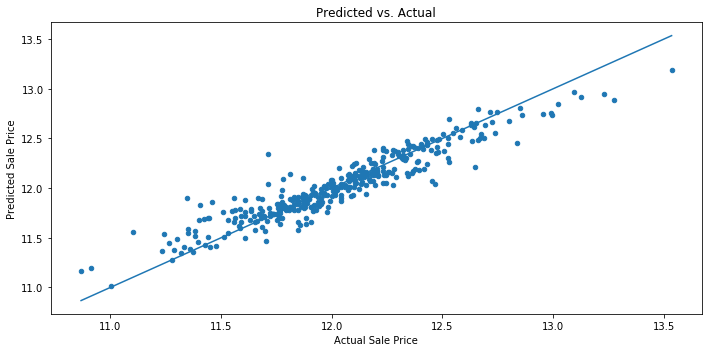

In [15]:
clf = RandomForestRegressor(n_estimators=5000, n_jobs=-1)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [16]:
clf.fit(x_train, y_train_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### test data로 prediction

In [17]:
y_pred = clf.predict(x_test)
randfor_pred = np.exp(y_pred)
randfor_pred

array([125861.54637305, 153101.22310646, 174331.91608085, ...,
       152863.1857389 , 115341.55063382, 235016.34462937])

- - -
# 5. xgboost

### 모델 정의 및 검증

24005.594767499093


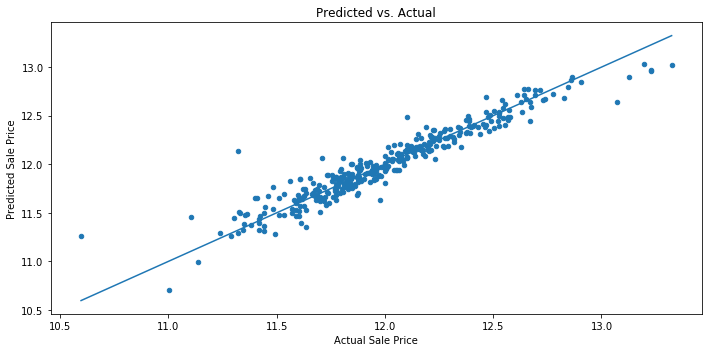

In [18]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

### train data 전체 학습

In [19]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.3, gamma=0.05, 
                             learning_rate=0.005, max_depth=4, 
                             min_child_weight=2.0, n_estimators=4000,
                             reg_alpha=0.5, reg_lambda=1.,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, tree_method='gpu_hist')

model_xgb.fit(x_train, y_train_log)
y_pred = model_xgb.predict(x_test)
xgb_pred = np.exp(y_pred)
print(xgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': xgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

[124170.41 161630.44 183607.55 ... 162480.14 117374.42 226059.42]


- - -
# 6. LightGBM

### 모델 정의 및 검증

27787.39353019323


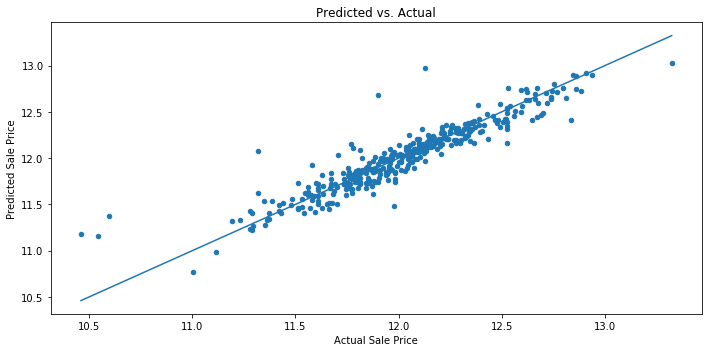

In [20]:
import lightgbm as lgb

y_train_log = y_train_log.reshape(y_train_log.shape[0])

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=5000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train1, y_train1)
y_pred = model_lgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(np.exp(y_test1),np.exp(y_pred)))

In [21]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=12000,
                              max_bin = 64, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=16 , bagging_seed=9,
                              min_data_in_leaf =3, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train, y_train_log)
y_pred = model_lgb.predict(x_test)
lgb_pred = np.exp(y_pred)
print(lgb_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': lgb_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/lgb_all_normalize_skewed.csv', index=False)

[127802.83550706 163502.79746301 184889.54519198 ... 177286.51881279
 113725.06059832 207193.54008689]


- - -
# 7. Lasso

In [22]:
from sklearn.linear_model import Lasso

las = Lasso(alpha =0.0005, random_state=1)
las.fit(x_train, y_train_log)
las_pred = np.exp(las.predict(x_test))

- - -
# 8. ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

model_EN = ElasticNet(alpha=0.001, l1_ratio=0.5, normalize=False)

model_EN.fit(x_train,y_train_log)
EN_pred = np.exp(model_EN.predict(x_test))

- - -
## K-fold cross validation

In [ ]:
from sklearn.cross_validation import cross_val_score

# randomforest, xgb, lgbm, lasso, ElasticNet 의 검증
model_list = [model_xgb, model_lgb, clf, las ,model_EN]

j = 0
for i in model_list:
    j+=1
    print(j, "  ", str(i).split('(')[0])
    scores = cross_val_score(estimator=i, 
                             X=x_train, 
                             y=y_train_log, 
                             cv=5,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f\n' % (np.mean(scores), np.std(scores)))
    

1    XGBRegressor
CV accuracy scores: [0.92825926 0.90310659 0.9038021  0.91775183 0.89750618]
CV accuracy: 0.910 +/- 0.011

2    LGBMRegressor
CV accuracy scores: [0.9147612  0.89991965 0.88941538 0.90872997 0.88498538]
CV accuracy: 0.900 +/- 0.011

3    RandomForestRegressor


- - -
# ensemble 적용, 예측
 실질적으로 2, 3번 model을 ensemble model로 선정하여 추가하였을 때 오히려 accuracy가 낮아진다. 그래서 2, 3번 model을 제외한 모든 model을 ensemble하여 평균값으로 최종 가격을 예측하였다.

In [ ]:
# (?, ) -> (?, 1)
randfor_pred = randfor_pred.reshape([randfor_pred.shape[0], 1])
xgb_pred = xgb_pred.reshape([xgb_pred.shape[0], 1])
lgb_pred = lgb_pred.reshape([lgb_pred.shape[0], 1])
las_pred = las_pred.reshape([las_pred.shape[0], 1])
EN_pred = EN_pred.reshape([EN_pred.shape[0], 1])

In [ ]:
mean_pred = (xgb_pred+hidden1_pred+lgb_pred + las_pred + EN_pred)/5

submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = (mean_pred)
print(submission)
submission.to_csv('./output_csv/mean_pred.csv', index=False)